In [1]:
!wget https://github.com/Yasinkrynk/autoCostMat/archive/refs/heads/main.zip

--2023-05-28 11:20:40--  https://github.com/Yasinkrynk/autoCostMat/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Yasinkrynk/autoCostMat/zip/refs/heads/main [following]
--2023-05-28 11:20:40--  https://codeload.github.com/Yasinkrynk/autoCostMat/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [   <=>              ] 192.56M  13.9MB/s    in 13s     

2023-05-28 11:20:54 (14.7 MB/s) - ‘main.zip’ saved [201918826]



In [2]:
!unzip main.zip

Archive:  main.zip
bc834ef85b38d7969b061458913566f17e09250d
   creating: autoCostMat-main/
   creating: autoCostMat-main/autoCostMat/
   creating: autoCostMat-main/autoCostMat/510_rhy2/
  inflating: autoCostMat-main/autoCostMat/510_rhy2/510_rhy2_per104558_pass.m4a  
  inflating: autoCostMat-main/autoCostMat/510_rhy2/510_rhy2_per109558_pass.m4a  
  inflating: autoCostMat-main/autoCostMat/510_rhy2/510_rhy2_per112658_pass.m4a  
  inflating: autoCostMat-main/autoCostMat/510_rhy2/510_rhy2_per120006_pass.m4a  
  inflating: autoCostMat-main/autoCostMat/510_rhy2/510_rhy2_per123558_pass.m4a  
  inflating: autoCostMat-main/autoCostMat/510_rhy2/510_rhy2_per123758_pass.m4a  
  inflating: autoCostMat-main/autoCostMat/510_rhy2/510_rhy2_per126795_pass.m4a  
  inflating: autoCostMat-main/autoCostMat/510_rhy2/510_rhy2_per126859_pass.m4a  
  inflating: autoCostMat-main/autoCostMat/510_rhy2/510_rhy2_per127795_pass.m4a  
  inflating: autoCostMat-main/autoCostMat/510_rhy2/510_rhy2_per130459_pass.m4a  
  in

In [3]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Gerekli TEST, TRAIN, WAV Klasörlerin Oluşturulması

In [4]:
import os
parent_dir = "/content"
for i in ['test','train', 'wav', 'deney1', 'deney2', 'deney3', 'deney4']:
  path = os.path.join(parent_dir, i)
  try:
    os.makedirs(path)
  except FileExistsError:
    print('The directory already exists')

parent_dir2 = "/content/deney3"
for i in ['test','train']:
  path = os.path.join(parent_dir2, i)
  try:
    os.makedirs(path)
  except FileExistsError:
    print('The directory already exists')

parent_dir3 = "/content/deney1"
path = os.path.join(parent_dir3, 'models')
try:
  os.makedirs(path)
except FileExistsError:
  print('The directory already exists')

    

# .M4A TO .WAV DÖNÜŞÜMÜ

In [5]:
folder = '/content/autoCostMat-main/autoCostMat'

sub_folders = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

In [6]:
import glob2
from pydub import AudioSegment
for class_name in sub_folders:
  temp= glob2.glob('/content/autoCostMat-main/autoCostMat/'+class_name+'/*.m4a')
  os.mkdir('/content/wav/'+class_name)
  for file in temp:
    m4a_file = file.split("/")[-1]
    file_name=m4a_file.split(".")[0]
    wav_filename = '/content/wav/'+class_name+'/'+file_name+".wav"

    track = AudioSegment.from_file(file,  format= 'm4a')
    file_handle = track.export(wav_filename, format='wav')

# Train test split

In [7]:
from shutil import copyfile

In [8]:
def split_array(genders):
  split_value=int(len(genders)*0.8)
  return genders[:split_value], genders[split_value:]

file_train=[]
file_test=[]
for class_name in sub_folders:
  temp= glob2.glob('/content/wav/'+class_name+'/*.wav')
  temp.sort()
  train, test=split_array(temp)
  file_train=file_train+train
  file_test=file_test+test

for file in file_test:
    new_name = file.replace('/content/wav', 'test')
    directory = os.path.basename(os.path.dirname(new_name))
    if not os.path.isdir(os.path.join('test', directory)):
        os.mkdir(os.path.join('test', directory))
    copyfile(file, new_name)

for file in file_train:
    new_name = file.replace('/content/wav', 'train')
    directory = os.path.basename(os.path.dirname(new_name))
    if not os.path.isdir(os.path.join('train', directory)):
        os.mkdir(os.path.join('train', directory))
    copyfile(file, new_name)

# Deney 1

source:https://github.com/MarkGelo/ML-Topics/tree/main/Music%20Genre%20Classification


pdf:https://github.com/MarkGelo/ML-Topics/blob/main/Music%20Genre%20Classification/Final_Paper.pdf

## Music Genre Classification

### Packages

In [ ]:
import os
import cv2
from tensorflow import keras
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import time
import sklearn
import tensorflow as tf
import pandas as pd
import itertools

from tensorflow.keras.models import (Model, Sequential)
from tensorflow.keras.layers import (Input, Add, Conv2D, MaxPooling2D, AveragePooling2D,
                                     GlobalAveragePooling2D, GlobalMaxPooling2D, Dense, Activation, Dropout, 
                                     Flatten, BatchNormalization, Concatenate)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (GridSearchCV, train_test_split)

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgbm
from sklearn.preprocessing import OneHotEncoder
import joblib

#### Global Variables

In [ ]:
FEATURES = ('stft', 'mfcc', 'melspectrogram', 'fouriertempogram')
EXTENDED_BALLROOM = {'nGenres': 39, 'genres': ['510_rhy2','51_rhy1','51_rhy2','52_rhy1','52_rhy2','53_rhy1','53_rhy2',
                                               '54_rhy1','54_rhy2','55_rhy1','55_rhy2','56_rhy1','56_rhy2','57_rhy1',
                                               '57_rhy2','58_rhy1','58_rhy2','59_rhy1','59_rhy2','610_rhy1','610_rhy2',
                                               '61_rhy1','61_rhy2','62_rhy1','62_rhy2','63_rhy1','63_rhy2','64_rhy1',
                                               '64_rhy2','65_rhy1','65_rhy2','66_rhy1','66_rhy2','67_rhy1','67_rhy2',
                                               '68_rhy1','68_rhy2','69_rhy1','69_rhy2']}
RNG_STATE = 422
EPOCHS = 50
BATCH_SIZE = 64

# make model csv file to save stats
MODEL_COLS = ["Model Name", "Method", "Dataset", "Feature", "Split", "Test Accuracy", "Test Loss",
                                     "Train Accuracy", "Train Loss", "Best Epoch", "Training Accuracy", "Training Loss"]
MODEL_STATS = pd.DataFrame(columns = MODEL_COLS)
if not os.path.exists('/content/deney1/models.csv'): # if not already made
    print("Created models.csv")
    MODEL_STATS.to_csv(r'/content/deney1/models.csv', index = False)

Created models.csv


### Helper Methods

In [ ]:
def getFeatures(feature, split):
    # LOADING
    dataset1='train'
    dataset2='test'

    X_train = np.load(os.path.join(os.getcwd(), "/content/deney1/datasets", dataset1, "features", f"{feature}{split}-X.npy"))
    Y_train = np.load(os.path.join(os.getcwd(), "/content/deney1/datasets", dataset1, "features", f"{feature}{split}-Y.npy"))
    X_test=np.load(os.path.join(os.getcwd(), "/content/deney1/datasets", dataset2, "features", f"{feature}{split}-X.npy"))
    Y_test=np.load(os.path.join(os.getcwd(), "/content/deney1/datasets", dataset2, "features", f"{feature}{split}-Y.npy"))

    return (X_train, X_test, Y_train, Y_test)

In [ ]:
def plot_graph(history, title, download = True):
    plt.plot(history.history['categorical_accuracy'])
    #plt.plot(history.history['val_categorical_accuracy'])
    plt.title(f'{title} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc = 'upper left')
    if download:
        plt.savefig(f'deney1/models/{name}-Accuracy.png')
    plt.show()
    
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title(f'{title} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc = 'upper left')
    if download:
        plt.savefig(f'/content/deney1/{name}-Loss.png')
    plt.show()

In [ ]:
def cnf_matrix(cm, labels, name = None):
    plt.figure(figsize=(11,11))
    
    norm_cm = cm / cm.sum(1)
    plt.imshow(norm_cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.xticks(list(range(len(labels))), labels)
    plt.yticks(list(range(len(labels))), labels)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted genre')
    plt.ylabel('True genre')
    thresh = norm_cm.max() / 2.0
    for i, j in itertools.product(range(norm_cm.shape[0]), range(norm_cm.shape[1])):
        plt.text(j, i, '{:.2g}'.format(norm_cm[i, j]),
                 horizontalalignment="center",
                 color="white" if norm_cm[i, j] > thresh else "black")
    
    if name:
        plt.savefig(f'deney1/{name}-ConfusionMatrix.png', dpi = 600)
    plt.show()

In [ ]:
def get_res(history, epoch):
    h = history.history
    train_acc = h['categorical_accuracy'][epoch - 1]
    #val_acc = h['val_categorical_accuracy'][epoch - 1]
    train_loss = h['loss'][epoch - 1]
    #val_loss = h['val_loss'][epoch - 1]
    #print(train_acc, val_acc, train_loss, val_loss)
    
    return train_acc, train_loss#, val_acc, val_loss

In [ ]:
def get_model(mod, data, feature, split):
    models_path = os.path.join(os.getcwd(), '/content/deney1/models')
    for file in os.listdir(models_path):
        if file.endswith('_'.join([mod, feature.upper(), data.upper(), str(split)]) + '.h5'):
            model = keras.models.load_model(os.path.join(models_path, file))
            break
    return model

## Processing

Librosa for feature extraction of audio files\
STFT | MFCC | Melspectrogram | Fourier Tempogram

GTZAN (10 Genres)\
Extended Ballroom (9 Genres - removed 4 for having less than 100 samples)

In [ ]:
def process(dataset, feature, time_split, verbose = False, save = False):
    N_FFT = 2048
    HOP_LENGTH = 1024
    N_MELS = 64
    N_MFCC = 13
    
    processed = []
    processed_genres = []
    
    feature = feature.lower()
    aud_path = os.path.join(os.getcwd(), "/content", dataset)
    if not os.path.exists(aud_path):
        print("Dataset not found:", aud_path)
        return
        
    features = ("stft", "melspectrogram", "mfcc", "fouriertempogram")
    TOTAL_GENRES = len(os.listdir(aud_path))

    if feature not in features:
        print(f"{feature} not available for extraction")
        return
    
    feat_path = os.path.join(os.getcwd(), "deney1/datasets", dataset, "features")
    os.path.isdir(feat_path) or os.makedirs(feat_path)
    
    currentGenre = 0
    for folder in os.listdir(aud_path):
        folder_path = os.path.join(aud_path, folder)
        for audio in os.listdir(folder_path):  
            audio_path = os.path.join(folder_path, audio)
            y, sr = librosa.load(audio_path) # can user offset and duration for 5 second intervals
            if feature == "stft":
                feat = np.abs(librosa.stft(y, hop_length = HOP_LENGTH, n_fft = N_FFT))
            elif feature == "mfcc":
                feat = librosa.feature.mfcc(y = y, sr = sr, hop_length = HOP_LENGTH, 
                                                      n_fft = N_FFT)
            elif feature == "melspectrogram":
                feat = librosa.feature.melspectrogram(y = y, sr = sr, n_mels = N_MELS, n_fft = N_FFT,
                                                     hop_length = HOP_LENGTH)
            elif feature == "fouriertempogram":
                oenv = librosa.onset.onset_strength(y = y, sr = sr, hop_length = HOP_LENGTH)
                feat = librosa.feature.fourier_tempogram(onset_envelope = oenv, sr = sr, hop_length = HOP_LENGTH)
                #feat = librosa.feature.tempogram(onset_envelope = oenv, sr = sr, hop_length = HOP_LENGTH)
            feat = librosa.power_to_db(feat ** 2) # feat ** 2 for amplitude to db
            #if len(feat[0]) != 647:
            #    print(len(feat[0]))
            #print(feat.shape)
            #print(feat[:2, :512].shape)
            #librosa.display.specshow(feat[:, :], sr=sr, hop_length = HOP_LENGTH, x_axis = 'time', y_axis = 'mel')
            #print(feat.shape)
            
            # max is (x, 647) or (x, 648) -- imma treat max as 640 -- can be //10,8,5,4,2 -> 3, 3.75, 6, 7.5, 15
            out = feat[:, :60]

            # split into segments -- 3, 3.75, 6, 7.5, 15 seconds
            out_split = np.hsplit(out, time_split)
            
            for split in out_split:
                processed.append(split)
                # one hot encoding
                processed_genres.append([1 if i == currentGenre else 0 for i in range(TOTAL_GENRES)])
                #librosa.display.specshow(split[:, :], sr=sr, hop_length = HOP_LENGTH, x_axis = 'time', y_axis = 'mel')
            #print(len(out_split))
            #librosa.display.specshow(out[:, :], sr=sr, hop_length = HOP_LENGTH)
        currentGenre += 1
        if verbose:
            print(folder, "complete;", feature, processed[0].shape)
    
    X = np.array(processed)
    Y = np.array(processed_genres)
    
    
    if save:
        np.save(os.path.join(feat_path, f"{feature + str(time_split)}-X.npy"), X)
        np.save(os.path.join(feat_path, f"{feature + str(time_split)}-Y.npy"), Y)
        
    
    return X, Y

### Run to extract features if have not done so already

Extracting features from Extended Ballroom taks a while, 10x+ longer than GTZAN

In [ ]:
#datasets = ("GTZAN", "Extended Ballroom",)
features = ("stft", "melspectrogram", "mfcc", "fouriertempogram",)
datasets = ("train", "test")
#splits = (10, 8, 5, 4, 2, 1)
splits = (1, )
for dataset in datasets:
    print("Processing", dataset, "with total genres of", 
              len(os.listdir(os.path.join(os.getcwd(), "", dataset))))
    for feature in features:
        start = time.perf_counter()
        for split in splits:
            process(dataset, feature, split, verbose = True, save = True)
        print(f"\t{feature} with splits", str(splits), "took", time.perf_counter() - start, "seconds")

## CNN

![CNN](images/CNN.png)

In [ ]:
class TRA(keras.callbacks.Callback):
    def __init__(self):
        super(TRA, self).__init__()
    
    def on_train_begin(self, logs=None):
        self.start_time= time.time()
        
    def on_train_end(self, logs=None):
        stop_time=time.time()
        tr_duration= stop_time- self.start_time            
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        msg = f'Training total time: {str(hours)} hours, {minutes:1.1f} minutes, {seconds:1.2f} seconds)'
        print(msg) 

### STFT (1025, 640)

![STFT](images/STFT.png)

In [ ]:
def conv_block(x, n_filters, kernel_size, conv_strides, pool_strides, pool_size):
    x = Conv2D(n_filters, kernel_size, strides = conv_strides, padding='same')(x)
    x = BatchNormalization()(x) # should do this
    x = Activation('relu')(x)
    
    # reduce overfitting by oversampling? extracts most prominent features
    x = MaxPooling2D(pool_size=pool_size, strides=pool_size, padding='same')(x)
    x = Dropout(0.25)(x) # to reduce overfitting # shouldnt do this when its first level
    return x

In [ ]:
def CNN(input_shape, num_genres, name):
    inpt = Input(shape=input_shape)
    
    x = conv_block(inpt, n_filters = 16, kernel_size = (3, 3), 
                   conv_strides = (1, 1), pool_strides = (2, 2), pool_size = (2, 2))
    
    x = conv_block(x, n_filters = 32, kernel_size = (3, 3), 
                   conv_strides = (1, 1), pool_strides = (2, 2), pool_size = (2, 2))
    
    x = conv_block(x, n_filters = 64, kernel_size = (3, 3), 
                   conv_strides = (1, 1), pool_strides = (2, 2), pool_size = (2, 2))
    
    x = conv_block(x, n_filters = 128, kernel_size = (3, 3), 
                   conv_strides = (1, 1), pool_strides = (4, 4), pool_size = (4, 4))
    
    x = conv_block(x, n_filters = 64, kernel_size = (3, 3), 
                   conv_strides = (1, 1), pool_strides = (2, 2), pool_size = (2, 2))
    
    x = Flatten()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu', 
              kernel_regularizer = tf.keras.regularizers.l2(0.01))(x)
    x = Dropout(0.25)(x)
    predictions = Dense(num_genres, 
                        activation='softmax', 
                        kernel_regularizer = tf.keras.regularizers.l2(0.02))(x)
    
    model = Model(inputs=inpt, outputs=predictions, name = name) # can add name
    return model

#### Extended Ballroom

In [ ]:
# Get Features
uid = np.random.randint(1, 10000) # 'unique' id
while sum([x.startswith(str(uid)) for x in os.listdir('/content/deney1/models/')]) != 0: # if duplicate
    uid = np.random.randint(1, 10000)
split =1
mod = 'CNN'
feat = 'stft'
dat = 'ExtendedBallroom'
name = '_'.join([x.upper() for x in [str(uid), mod, feat,dat, str(split)]])
X_train, X_test, Y_train, Y_test = getFeatures(feat, split)
# Model
m = CNN(X_train.shape[1:] + (1,), EXTENDED_BALLROOM['nGenres'], name)
opt = keras.optimizers.Adam(lr = 0.001)
m.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ['categorical_accuracy'])
m.summary()

Model: "2885_CNN_STFT_EXTENDEDBALLROOM_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1025, 60, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 1025, 60, 16)      160       
                                                                 
 batch_normalization (BatchN  (None, 1025, 60, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 1025, 60, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 513, 30, 16)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None

In [ ]:
time_callback=[TRA()]
checkpoint_path = 'deney1/checkpoints/stft-{epoch:02d}.hdf5'
history = m.fit(X_train, Y_train, epochs = 5, batch_size = BATCH_SIZE,
     callbacks = [ModelCheckpoint(filepath = checkpoint_path, save_weights_only = False), time_callback])

Epoch 1/5
33/33 [==============================] - 258s 8s/step - loss: 9.2810 - categorical_accuracy: 0.0338
Epoch 2/5
33/33 [==============================] - 244s 7s/step - loss: 7.8970 - categorical_accuracy: 0.0433
Epoch 3/5
33/33 [==============================] - 258s 8s/step - loss: 6.9276 - categorical_accuracy: 0.0542
Epoch 4/5
33/33 [==============================] - 247s 7s/step - loss: 6.0967 - categorical_accuracy: 0.0637
Epoch 5/5
33/33 [==============================] - 256s 8s/step - loss: 5.3743 - categorical_accuracy: 0.0747
Training total time: 0.0 hours, 21.0 minutes, 1.88 seconds)


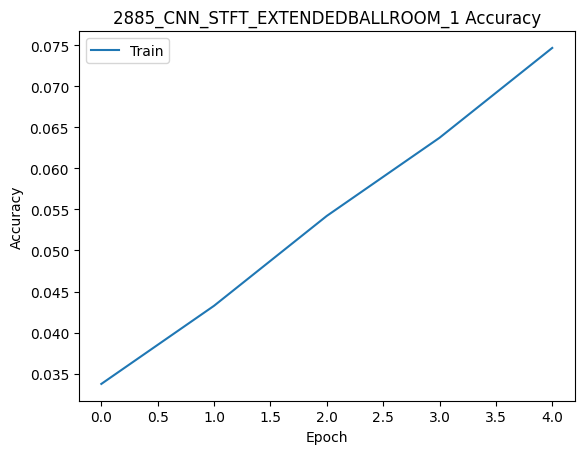

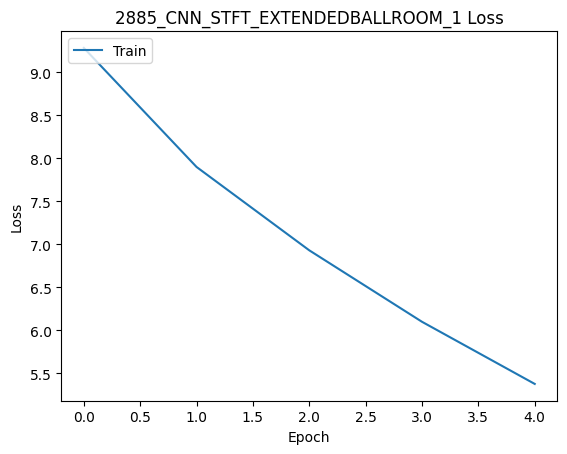

In [ ]:
plot_graph(history, name) 

In [ ]:
best_epoch = 5
train_acc, train_loss= get_res(history, best_epoch)
#print(train_acc, val_acc, train_loss, val_loss)

m.load_weights(f'deney1/checkpoints/stft-{best_epoch:02d}.hdf5') # gets the best model weights

In [ ]:
train = m.evaluate(X_train, Y_train)
print("Loss:", train[0])
print("Train Accuracy:", train[1])

test = m.evaluate(X_test, Y_test)
print("Loss:", test[0])
print("Test Accuracy:", test[1])

66/66 [==============================] - 71s 1s/step - loss: 5.0388 - categorical_accuracy: 0.0956
Loss: 5.038765907287598
Train Accuracy: 0.09557774662971497
18/18 [==============================] - 16s 918ms/step - loss: 5.0536 - categorical_accuracy: 0.0911
Loss: 5.053586483001709
Test Accuracy: 0.09107468277215958


In [ ]:
m.save(f'/content/deney1/models/{name}.h5') # save model
# save stats of model
#cur_mod_stats = pd.DataFrame([[name, mod, dat, feat, split, test[1], test[0], train[1], train[0],
                             #best_epoch, 0,0,train_acc, train_loss]], columns = MODEL_COLS)
#cur_mod_stats.to_csv('/content/models.csv', mode = 'a', header = False, index = False)

### MFCC (20, 640)

![MFCC](images/MFCC.png)

In [ ]:
def MFCC_block(x, n_filters, kernel_size, conv_strides, pool_strides, pool_size, dropout = None):
    x = Conv2D(n_filters, kernel_size, strides = conv_strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # reduce overfitting by oversampling? extracts most prominent features
    x = MaxPooling2D(pool_size=pool_size, strides=pool_size)(x)
    if dropout:
        x = Dropout(dropout)(x) # to reduce overfitting # shouldnt do this when its first level
    return x

In [ ]:
def MFCC_CNN(input_shape, num_genres, name):
    inpt = Input(shape=input_shape)
    
    x = MFCC_block(inpt, n_filters = 32, kernel_size = (3, 3), 
                   conv_strides = (1, 1), pool_strides = (2, 2), pool_size = (2, 2), dropout = 0.25)
    
    x = MFCC_block(x, n_filters = 64, kernel_size = (3, 3), 
                   conv_strides = (1, 1), pool_strides = (2, 2), pool_size = (2, 2), dropout = 0.25)
    
    x = MFCC_block(x, n_filters = 128, kernel_size = (3, 3), 
                   conv_strides = (1, 1), pool_strides = (2, 2), pool_size = (2, 2), dropout = 0.25)
    
    x = MFCC_block(x, n_filters = 64, kernel_size = (3, 3), 
                   conv_strides = (1, 1), pool_strides = (2, 2), pool_size = (2, 2), dropout = 0.25)
    
    x = Flatten()(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu', 
              kernel_regularizer = tf.keras.regularizers.l2(0.01))(x)
    x = Dropout(0.25)(x)
    predictions = Dense(num_genres, 
                        activation='softmax', 
                        kernel_regularizer = tf.keras.regularizers.l2(0.02))(x)
    
    model = Model(inputs=inpt, outputs=predictions, name = name)
    return model

#### Extended Ballroom

Model: "2350_CNN_MFCC_EXTENDEDBALLROOM_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20, 60, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 60, 32)        320       
                                                                 
 batch_normalization_5 (Batc  (None, 20, 60, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 20, 60, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None

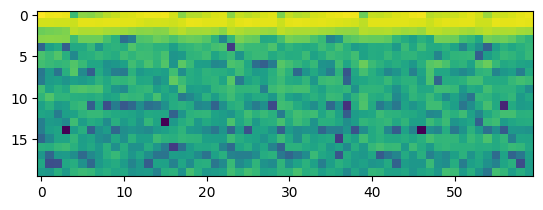

In [ ]:
# Get Features
uid = np.random.randint(1, 10000) # 'unique' id
while sum([x.startswith(str(uid)) for x in os.listdir('/content/deney1/models/')]) != 0: # if duplicate
    uid = np.random.randint(1, 10000)
split = 1
mod = 'CNN'
feat = 'MFCC'
dat = 'ExtendedBallroom'
name = '_'.join([x.upper() for x in [str(uid), mod, feat,dat, str(split)]])
X_train, X_test, Y_train, Y_test = getFeatures("mfcc", split)
#print(X_train.shape)
plt.imshow(X_train[1])
# Model
m = MFCC_CNN(X_train.shape[1:] + (1,), EXTENDED_BALLROOM['nGenres'], name)
opt = keras.optimizers.Adam(lr = 0.001)
m.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ['categorical_accuracy'])
m.summary()

In [ ]:
time_callback=[TRA()]
checkpoint_path = 'deney1/checkpoints/mfcc-{epoch:02d}.hdf5'
history = m.fit(X_train, Y_train, epochs = 5, batch_size = BATCH_SIZE,
     callbacks = [ModelCheckpoint(filepath = checkpoint_path, save_weights_only = False), time_callback])

Epoch 1/5
33/33 [==============================] - 18s 411ms/step - loss: 7.3242 - categorical_accuracy: 0.0361
Epoch 2/5
33/33 [==============================] - 10s 290ms/step - loss: 6.4119 - categorical_accuracy: 0.0456
Epoch 3/5
33/33 [==============================] - 8s 256ms/step - loss: 5.8356 - categorical_accuracy: 0.0599
Epoch 4/5
33/33 [==============================] - 9s 269ms/step - loss: 5.3860 - categorical_accuracy: 0.0628
Epoch 5/5
33/33 [==============================] - 9s 286ms/step - loss: 4.9949 - categorical_accuracy: 0.0680
Training total time: 0.0 hours, 0.0 minutes, 54.60 seconds)


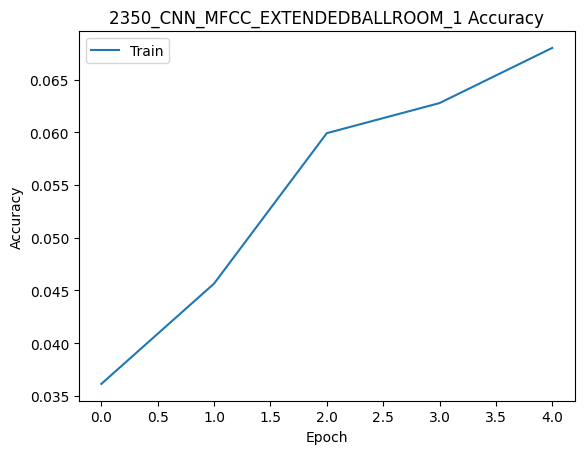

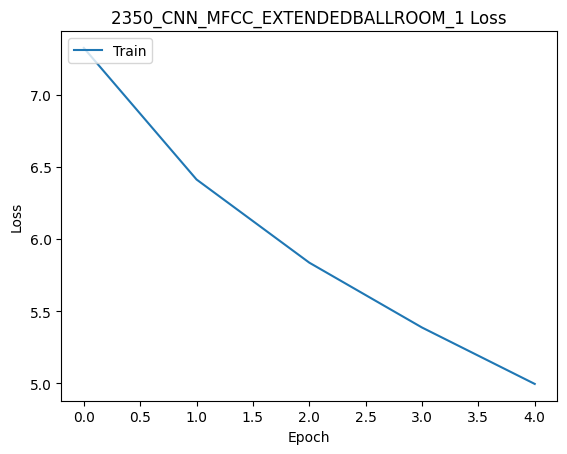

In [ ]:
plot_graph(history, name)

In [ ]:
best_epoch = 5
train_acc, train_loss= get_res(history, best_epoch)
#print(train_acc, val_acc, train_loss, val_loss)

m.load_weights(f'deney1/checkpoints/mfcc-{best_epoch:02d}.hdf5') # gets the best model weights

In [ ]:
train = m.evaluate(X_train, Y_train)
print("Loss:", train[0])
print("Train Accuracy:", train[1])

test = m.evaluate(X_test, Y_test)
print("Loss:", test[0])
print("Test Accuracy:", test[1])

66/66 [==============================] - 6s 86ms/step - loss: 4.8069 - categorical_accuracy: 0.0675
Loss: 4.806933403015137
Train Accuracy: 0.06752258539199829
18/18 [==============================] - 1s 39ms/step - loss: 4.8166 - categorical_accuracy: 0.0656
Loss: 4.816585063934326
Test Accuracy: 0.06557376682758331


In [ ]:
m.save(f'/content/deney1/models/{name}.h5') # save model
# save stats of model
cur_mod_stats = pd.DataFrame([[name, mod, dat, feat, split, test[1], test[0], train[1], train[0],
                             best_epoch, train_acc, train_loss]], columns = MODEL_COLS)
cur_mod_stats.to_csv('deney1/models/models.csv', mode = 'a', header = False, index = False)

### Melspectrogram (64, 640)

![MELSPECTROGRAM](images/MELSPECTROGRAM.png)

In [ ]:
def mel_block(x, n_filters, kernel_size, conv_strides, pool_strides, pool_size):
    x = Conv2D(n_filters, kernel_size, strides = conv_strides, padding='same')(x)
    #x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # reduce overfitting by oversampling? extracts most prominent features
    x = MaxPooling2D(pool_size=pool_size, strides=pool_size)(x)
    x = Dropout(0.25)(x) # to reduce overfitting # shouldnt do this when its first level
    return x

In [ ]:
def MEL_CNN(input_shape, num_genres, name):
    inpt = Input(shape=input_shape)
    
    x = mel_block(inpt, n_filters = 16, kernel_size = (3, 3), 
                   conv_strides = (1, 1), pool_strides = (2, 2), pool_size = (2, 2))
    
    x = mel_block(x, n_filters = 32, kernel_size = (3, 3), 
                   conv_strides = (1, 1), pool_strides = (2, 2), pool_size = (2, 2))
    
    x = mel_block(x, n_filters = 64, kernel_size = (3, 3), 
                   conv_strides = (1, 1), pool_strides = (2, 2), pool_size = (2, 2))
    
    x = mel_block(x, n_filters = 128, kernel_size = (3, 3), 
                   conv_strides = (1, 1), pool_strides = (4, 4), pool_size = (4, 4))
    
    x = Flatten()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu', 
              kernel_regularizer = tf.keras.regularizers.l2(0.01))(x)
    x = Dropout(0.25)(x)
    
    predictions = Dense(num_genres, 
                        activation='softmax', 
                        kernel_regularizer = tf.keras.regularizers.l2(0.02))(x)
    
    model = Model(inputs=inpt, outputs=predictions, name = name)
    return model

#### Extended Ballroom

(2103, 64, 60)


Model: "3885_CNN_MELSPECTROGRAM_EXTENDEDBALLROOM_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 60, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 60, 16)        160       
                                                                 
 activation_9 (Activation)   (None, 64, 60, 16)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 30, 16)       0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 32, 30, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 30, 32)        4640      
                        

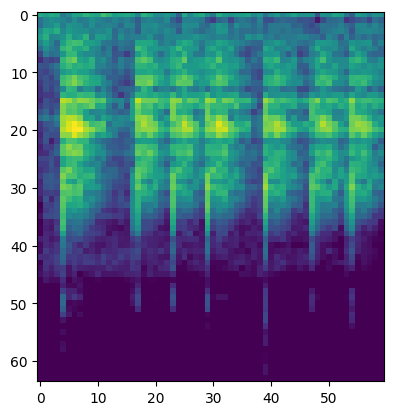

In [ ]:
# Get Features
uid = np.random.randint(1, 10000) # 'unique' id
while sum([x.startswith(str(uid)) for x in os.listdir('/content/deney1/models/')]) != 0: # if duplicate
    uid = np.random.randint(1, 10000)
split = 1
mod = 'CNN'
feat = 'melspectrogram'
dat = 'ExtendedBallroom'
name = '_'.join([x.upper() for x in [str(uid), mod, feat,dat, str(split)]])
X_train, X_test, Y_train, Y_test = getFeatures(feat, split)
print(X_train.shape)
plt.imshow(X_train[1])
# Model
m = MEL_CNN(X_train.shape[1:] + (1,), EXTENDED_BALLROOM['nGenres'], name)
opt = keras.optimizers.Adam(lr = 0.001)
m.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ['categorical_accuracy'])
m.summary()

In [ ]:
checkpoint_path = 'deney1/checkpoints/melspectrogram-{epoch:02d}.hdf5'
history = m.fit(X_train, Y_train, epochs = 5, batch_size = BATCH_SIZE,
     callbacks = [ModelCheckpoint(filepath = checkpoint_path, save_weights_only = False), time_callback])

Epoch 1/5
33/33 [==============================] - 20s 481ms/step - loss: 9.1023 - categorical_accuracy: 0.0361
Epoch 2/5
33/33 [==============================] - 11s 348ms/step - loss: 7.0998 - categorical_accuracy: 0.0485
Epoch 3/5
33/33 [==============================] - 11s 345ms/step - loss: 6.7318 - categorical_accuracy: 0.0642
Epoch 4/5
33/33 [==============================] - 10s 302ms/step - loss: 6.3598 - categorical_accuracy: 0.0685
Epoch 5/5
33/33 [==============================] - 13s 397ms/step - loss: 6.0369 - categorical_accuracy: 0.0675
Training total time: 0.0 hours, 1.0 minutes, 6.28 seconds)


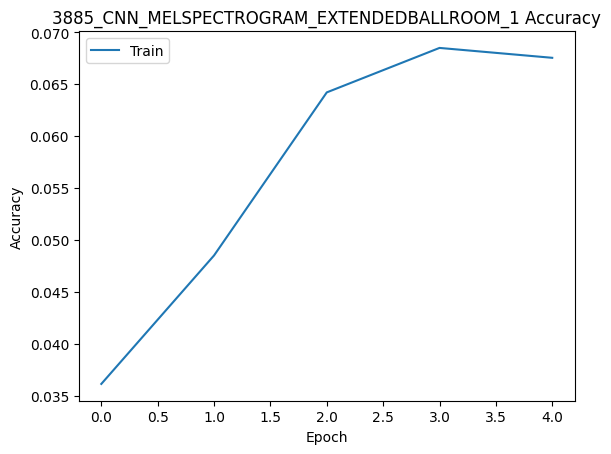

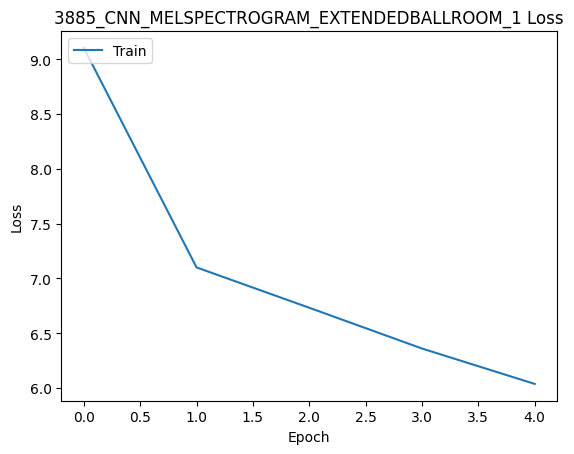

In [ ]:
plot_graph(history, name)

In [ ]:
best_epoch = 5
train_acc, train_loss= get_res(history, best_epoch)
#print(train_acc, val_acc, train_loss, val_loss)

m.load_weights(f'deney1/checkpoints/melspectrogram-{best_epoch:02d}.hdf5') # gets the best model weights

In [ ]:
train = m.evaluate(X_train, Y_train)
print("Loss:", train[0])
print("Train Accuracy:", train[1])

test = m.evaluate(X_test, Y_test)
print("Loss:", test[0])
print("Test Accuracy:", test[1])

66/66 [==============================] - 5s 69ms/step - loss: 5.9003 - categorical_accuracy: 0.0675
Loss: 5.900308132171631
Train Accuracy: 0.06752258539199829
18/18 [==============================] - 1s 76ms/step - loss: 5.9027 - categorical_accuracy: 0.0656
Loss: 5.902651786804199
Test Accuracy: 0.06557376682758331


In [ ]:
m.save(f'/content/deney1/models/{name}.h5') # save model
# save stats of model
cur_mod_stats = pd.DataFrame([[name, mod, dat, feat, split, test[1], test[0], train[1], train[0],
                             best_epoch, train_acc, train_loss]], columns = MODEL_COLS)
cur_mod_stats.to_csv('/content/deney1/models.csv', mode = 'a', header = False, index = False)

## Base Results

In the results below, Train Accuracy and Training Accuracy are different. Training Accuracy is the training accuracy from the resulting best epoch, while the Train Accuracy is basically the overall train accuracy of the model. 

In [ ]:
MODELS_PATH = os.path.join(os.getcwd(), '/content/deney1', 'models.csv')
MODELS = pd.read_csv(MODELS_PATH).set_index("Model Name")
MODELS = MODELS.sort_values('Test Accuracy', ascending = False)
# only base results -- no double inputs and classical
MODELS = MODELS[MODELS['Feature'].isin(['STFT', 'MFCC', 'MELSPECTROGRAM'])]
MODELS = MODELS[MODELS['Method'] == 'CNN']
MODELS

,Method,Dataset,Feature,Split,Test Accuracy,Test Loss,Train Accuracy,Train Loss,Best Epoch,Training Accuracy,Training Loss
Model Name,,,,,,,,,,,


In [ ]:
for d in ['ExtendedBallroom']:
    print(d + ':')
    for i in [1, 2, 4, 5, 8, 10]:
        temp = MODELS[MODELS["Split"] == i]
        temp = temp[temp['Dataset'] == d]
        test_a = temp["Test Accuracy"].mean()
        train_a = temp["Train Accuracy"].mean()
        print(f"{i} split: Avg test Accuracy: {test_a:.3f}, Avg train Accuracy: {train_a:.3f}")
        

ExtendedBallroom:
1 split: Avg test Accuracy: nan, Avg train Accuracy: nan
2 split: Avg test Accuracy: nan, Avg train Accuracy: nan
4 split: Avg test Accuracy: nan, Avg train Accuracy: nan
5 split: Avg test Accuracy: nan, Avg train Accuracy: nan
8 split: Avg test Accuracy: nan, Avg train Accuracy: nan
10 split: Avg test Accuracy: nan, Avg train Accuracy: nan


##### With the results above, I decided to use Split of 8s due to having more sample sizes which would lead to less overfitting and still having a high enough test accuracy.

## Confusion Matrix

18/18 [==============================] - 16s 885ms/step


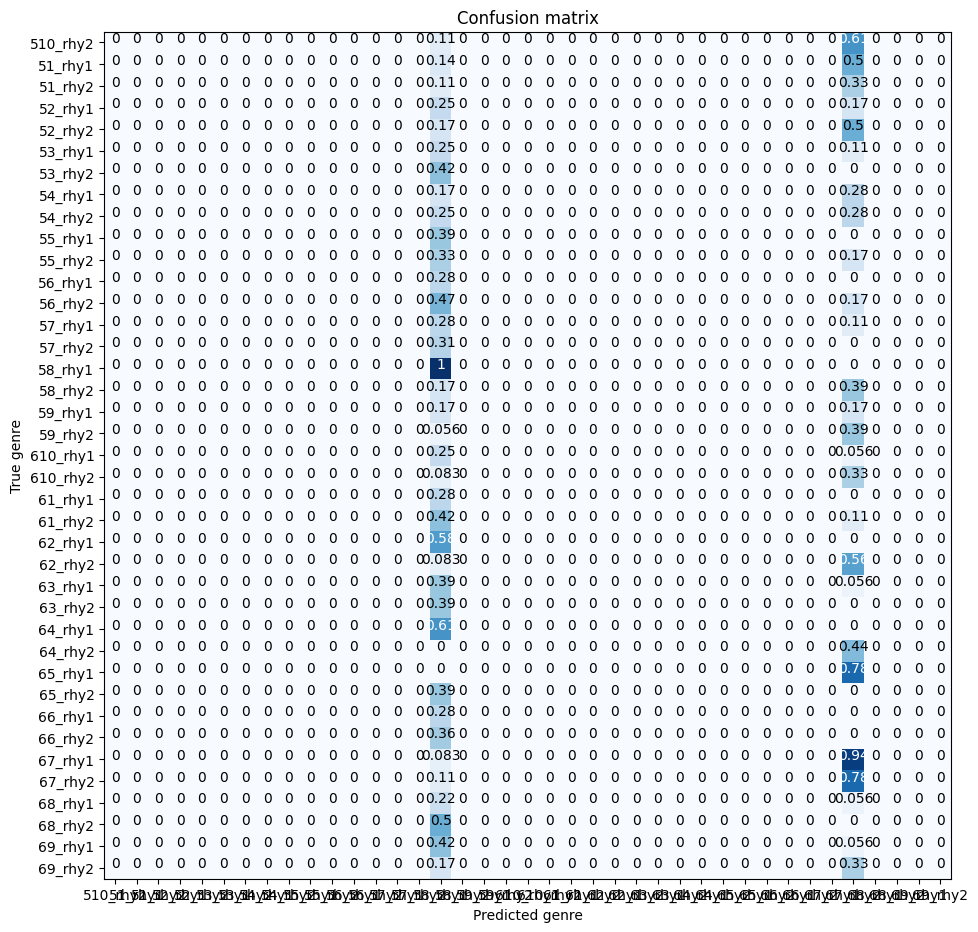

In [ ]:
dat = 'ExtendedBallroom'
feat='stft'
model = get_model('CNN', dat, feat, split)
dat = 'Extended Ballroom'
X_train, X_test, Y_train, Y_test = getFeatures(feat, split)
del X_train, Y_train # not needed

preds = model.predict(X_test)
cm = confusion_matrix(y_true = Y_test.argmax(axis = 1), y_pred = preds.argmax(axis = 1))
cnf_matrix(cm, EXTENDED_BALLROOM['genres'], name = f'{dat}-{feat}-{split}')

## Dual CNN + Classical

![Dual CNN + Classical](images/DUALCNNCLASSICAL.png)

In [ ]:
def classical_parallel_model(model1, x_train1, x_test1, y_train1, y_test1, 
                             model2, x_train2, x_test2, y_train2, y_test2,
                             num_genres, name, classifier):
    # layer name need to be unique
    i = 0
    for layer in model1.layers:
        layer._name += f"_{i}"
        i += 1
    for layer in model2.layers:
        layer._name += f"_{i}"
        i += 1
    
    m1_layer = [l.output for l in model1.layers if type(l) == Flatten][0]
    m2_layer = [l.output for l in model2.layers if type(l) == Flatten][0]
    m1 = Model(inputs = model1.input, outputs = m1_layer)
    m2 = Model(inputs = model2.input, outputs = m2_layer)

    # feature extraction
    m1_output = m1.predict(x_train1)
    m2_output = m2.predict(x_train2)
    output_features = np.column_stack((m1_output, m2_output)) # concatenation
    
    global X_train1, X_train2
    del X_train1, X_train2, x_train1, x_train2 # delete unneeded  var cuz takes up too much space

    # testing
    testing_m1_output = m1.predict(x_test1)
    testing_m2_output = m2.predict(x_test2)
    testing_output_features = np.column_stack((testing_m1_output, testing_m2_output)) # concatenation
    
    global X_test1, X_test2
    del X_test1, X_test2, x_test1, x_test2 # delete unneeded var cuz takes up too much space

    notOHE = [np.argmax(x) for x in y_train2] # inverse one hot encoding - ytrain2 and ytrain1 same
    notOHEtest = [np.argmax(x) for x in y_test1] # ytest1, ytest2 same
    
    global Y_train1, Y_train2, Y_test1, Y_test2
    del Y_train1, Y_train2, Y_test1, Y_test2, y_train1, y_train2, y_test1, y_test2
    
    PIPING = [
        ('scaling', StandardScaler()), 
        # Standardize features by removing the mean and scaling to unit variance
        ('variance_tresh', VarianceThreshold(threshold=(0.1))), 
        # removes low variance features
        ('feature_selection', SelectFromModel(lgbm.LGBMClassifier()))
        # Meta-transformer for selecting features based on importance weights.
        # Light gradient boosting model -- fastest while being accurate
    ]

    if classifier == 'rf':
        params = {
            "algo__n_estimators": [100, 200, 300, 500],
            "algo__criterion": ["gini", "entropy"],
            "algo__max_depth": [10, None]
        }
        PIPING.append(('algo', RandomForestClassifier()))
        pipe = Pipeline(PIPING)
    elif classifier == 'lr':
        params = {
            "algo__penalty": ["l2"],
            "algo__C": [0.1, 0.25, 0.5],
            "algo__max_iter": [500],
            "algo__solver": ["lbfgs"]
        }
        PIPING.append(('algo', LogisticRegression()))
        pipe = Pipeline(PIPING)
    elif classifier == 'svm':
        params = {
            "algo__C": [0.25, 0.5, 2, 4, 6],
            "algo__kernel": ['rbf', 'linear'],
        }
        PIPING.append(('algo', SVC()))
        pipe = Pipeline(PIPING)
    elif classifier == 'knn':
        params = {
            'algo__n_neighbors': [3, 5, 7, 10],
            'algo__metric': ['euclidean']
        }
        PIPING.append(('nca', NeighborhoodComponentsAnalysis()))
        PIPING.append(('algo', KNeighborsClassifier()))
        pipe = Pipeline(PIPING)
    
    grid = GridSearchCV(pipe, params, scoring = 'accuracy', n_jobs = 6, cv = 10, verbose = 3)
    grid.fit(output_features, notOHE)
    #val_acc = grid.best_score_
    #print("best score on validation set (accuracy) = {:.4f}".format(grid.best_score_))
    
    preds = grid.predict(output_features)
    train_acc = accuracy_score(preds, notOHE)
    print("best score on training set (accuracy) = {:.4f}".format(accuracy_score(preds, notOHE)))

    preds = grid.predict(testing_output_features)
    test_acc = accuracy_score(preds, notOHEtest)
    print("best score on test set (accuracy) = {:.4f}".format(accuracy_score(preds, notOHEtest)))
    
    return (grid, test_acc, train_acc)#, val_acc)

In [ ]:
def parallel_model(model1, model2, num_genres, name):
    # layer name need to be unique
    i = 0
    for layer in model1.layers:
        layer._name += f"_{i}"
        i += 1
    for layer in model2.layers:
        layer._name += f"_{i}"
        i += 1
    
    # get flattened layer for each
    m1_layer = [l.output for l in model1.layers if type(l) == Flatten][0]
    m2_layer = [l.output for l in model2.layers if type(l) == Flatten][0]
    
    # Merged models
    merged = Concatenate()([m1_layer, m2_layer])
    
    x = Flatten()(merged)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu', 
              kernel_regularizer = tf.keras.regularizers.l2(0.01))(x)
    x = Dropout(0.25)(x)
    
    predictions = Dense(num_genres, 
                        activation='softmax', 
                        kernel_regularizer = tf.keras.regularizers.l2(0.02))(x)
    
    model = Model(inputs = [model1.input, model2.input], outputs=predictions, name = name)
    return model

## STFT + MFCC

![STFT](images/STFT.png)
![MFCC](images/MFCC.png)

### Extended Ballroom

In [ ]:
# Get Features and Models
split = 1
mod = 'CNN'
dat = 'ExtendedBallroom' # for name, cant have space
DATA = "Extended Ballroom" # to get feature
uid = np.random.randint(1, 10000) # 'unique' id
while sum([x.startswith(str(uid)) for x in os.listdir('/content/deney1/models/')]) != 0: # if duplicate
    uid = np.random.randint(1, 10000)
    
feat1 = 'stft'
model1 = get_model(mod, dat, feat1, split)
X_train1, X_test1, Y_train1, Y_test1 = getFeatures(feat1, split)

feat2 = 'mfcc'
model2 = get_model(mod, dat, feat2, split)
X_train2, X_test2, Y_train2, Y_test2 = getFeatures(feat2, split)

name = '_'.join([x.upper() for x in [str(uid), mod, feat1, feat2, dat, str(split)]])

#### Base

In [ ]:
m = parallel_model(model1, model2, EXTENDED_BALLROOM['nGenres'], name)
opt = keras.optimizers.Adam(lr = 0.001)
m.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ['categorical_accuracy'])
m.summary()

Model: "1951_CNN_STFT_MFCC_EXTENDEDBALLROOM_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1_0 (InputLayer)         [(None, 1025, 60, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 1025, 60, 16  160         ['input_1_0[0][0]']              
                                )                                                                 
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 1025, 60, 16  64         ['conv2d_1[0][0]']               
 rmalization)                   )                             

In [ ]:
time_callback=[TRA()]
checkpoint_path = 'deney1/checkpoints/stft-mfcc-{epoch:02d}.hdf5'
history = m.fit([X_train1, X_train2], Y_train1, epochs = 5, batch_size = BATCH_SIZE,
     callbacks = [ModelCheckpoint(filepath = checkpoint_path, save_weights_only = False), time_callback])

Epoch 1/5
33/33 [==============================] - 257s 8s/step - loss: 9.1837 - categorical_accuracy: 0.0437
Epoch 2/5
33/33 [==============================] - 248s 7s/step - loss: 7.5878 - categorical_accuracy: 0.0870
Epoch 3/5
33/33 [==============================] - 264s 8s/step - loss: 6.3780 - categorical_accuracy: 0.1108
Epoch 4/5
33/33 [==============================] - 257s 8s/step - loss: 5.3719 - categorical_accuracy: 0.1360
Epoch 5/5
33/33 [==============================] - 252s 8s/step - loss: 4.3584 - categorical_accuracy: 0.2259
Training total time: 0.0 hours, 21.0 minutes, 19.01 seconds)


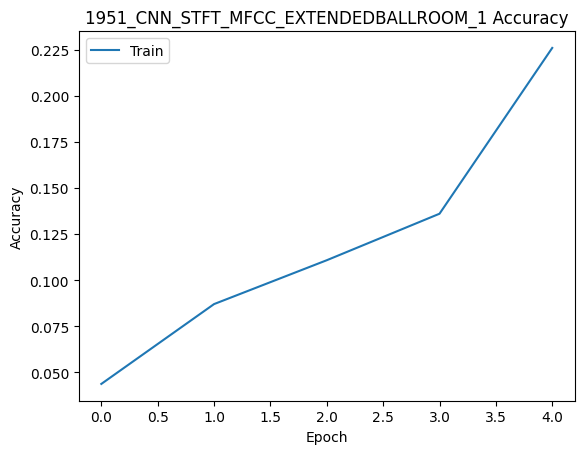

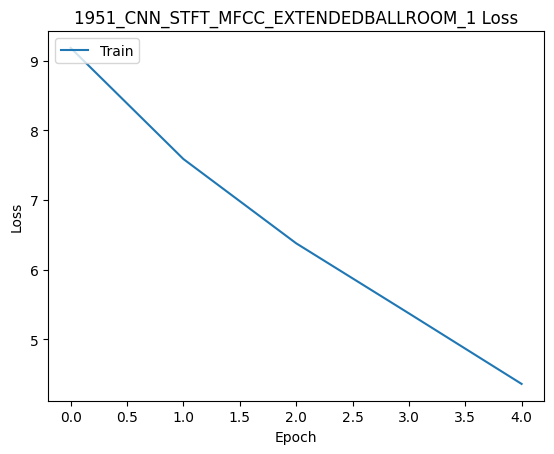

In [ ]:
plot_graph(history, name)

In [ ]:
best_epoch = 5
train_acc, train_loss= get_res(history, best_epoch)
#print(train_acc, val_acc, train_loss, val_loss)

m.load_weights(f'deney1/checkpoints/stft-mfcc-{best_epoch:02d}.hdf5') # gets the best model weights

In [ ]:
train = m.evaluate([X_train1, X_train2], Y_train1)
print("Train Loss:", train[0])
print("Train Accuracy:", train[1])
test = m.evaluate([X_test1, X_test2], Y_test1)
print("Test Loss:", test[0])
print("Test Accuracy:", test[1])

66/66 [==============================] - 69s 1s/step - loss: 5.6378 - categorical_accuracy: 0.0466
Train Loss: 5.637823581695557
Train Accuracy: 0.0466000959277153
18/18 [==============================] - 16s 896ms/step - loss: 5.6314 - categorical_accuracy: 0.0455
Test Loss: 5.631442546844482
Test Accuracy: 0.04553734138607979


In [ ]:
m.save(f'/content/deney1/models/{name}.h5') # save model
# save stats of model
#cur_mod_stats = pd.DataFrame([[name, mod, dat, ', '.join([feat1, feat2]), split, test[1], test[0], train[1], train[0],
                            # best_epoch, 0,0,train_acc, train_loss]], columns = MODEL_COLS)
#cur_mod_stats.to_csv('/content/models.csv', mode = 'a', header = False, index = False)

#### Classical

In [ ]:
classifiers = ['lr', 'rf', 'svm']
#classifiers = ['knn'] # takes too long -- takes up too much memory
for classifier in classifiers:
    # Get Features and Models
    split = 1
    mod = 'CNN'
    dat = 'ExtendedBallroom' # for name, cant have space
    DATA = "Extended Ballroom" # to get feature
    uid = np.random.randint(1, 10000) # 'unique' id
    while sum([x.startswith(str(uid)) for x in os.listdir('/content/deney1/models/')]) != 0: # if duplicate
        uid = np.random.randint(1, 10000)

    feat1 = 'stft'
    model1 = get_model(mod, dat, feat1, split)
    X_train1, X_test1, Y_train1, Y_test1 = getFeatures(feat1, split)

    feat2 = 'mfcc'
    model2 = get_model(mod, dat, feat2, split)
    X_train2, X_test2, Y_train2, Y_test2 = getFeatures(feat2, split)

    name = '_'.join([x.upper() for x in [str(uid), mod, feat1, feat2, classifier, dat, str(split)]])
    
    # training
    pm, test_acc, train_acc, val_acc = classical_parallel_model(model1, X_train1, X_test1, Y_train1, Y_test1,
                                                                model2, X_train2, X_test2, Y_train2, Y_test2,
                                                                EXTENDED_BALLROOM['nGenres'], name, classifier)
    
    joblib.dump(pm, f'/content/deney1/models/{name}.pkl') # save model
    # save stats of model
    cur_mod_stats = pd.DataFrame([[name, mod + " + " + classifier.upper(), dat, ', '.join([feat1, feat2]), split, 
                                   test_acc, None, train_acc, None,
                                 None, val_acc, None, None, None]], columns = MODEL_COLS)
    cur_mod_stats.to_csv('/content/deney1/models.csv', mode = 'a', header = False, index = False)

## STFT + MELSPECTROGRAM

![STFT](images/STFT.png)
![MELSPECTROGRAM](images/MELSPECTROGRAM.png)

Extended Ballroom

In [ ]:
# Get Features and Models
split = 1
mod = 'CNN'
dat = 'ExtendedBallroom' # for name, cant have space
DATA = "Extended Ballroom" # to get feature
uid = np.random.randint(1, 10000) # 'unique' id
while sum([x.startswith(str(uid)) for x in os.listdir('/content/deney1/models/')]) != 0: # if duplicate
    uid = np.random.randint(1, 10000)
    
feat1 = 'stft'
model1 = get_model(mod, dat, feat1, split)
X_train1, X_test1, Y_train1, Y_test1 = getFeatures(feat1, split)

feat2 = 'melspectrogram'
model2 = get_model(mod, dat, feat2, split)
X_train2, X_test2, Y_train2, Y_test2 = getFeatures(feat2, split)
# Ytest_1, Y_test2 are equal, same with train

name = '_'.join([x.upper() for x in [str(uid), mod, feat1, feat2, dat, str(split)]])

#### Base

In [ ]:
m = parallel_model(model1, model2, EXTENDED_BALLROOM['nGenres'], name)
opt = keras.optimizers.Adam(lr = 0.001)
m.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ['categorical_accuracy'])
m.summary()

Model: "1094_CNN_STFT_MELSPECTROGRAM_EXTENDEDBALLROOM_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1_0 (InputLayer)         [(None, 1025, 60, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 1025, 60, 16  160         ['input_1_0[0][0]']              
                                )                                                                 
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 1025, 60, 16  64         ['conv2d_1[0][0]']               
 rmalization)                   )                   

In [ ]:
checkpoint_path = 'deney1/checkpoints/stft-melspectrogram-{epoch:02d}.hdf5'
history = m.fit([X_train1, X_train2], Y_train1, epochs = 5, batch_size = BATCH_SIZE,
     callbacks = [ModelCheckpoint(filepath = checkpoint_path, save_weights_only = False), time_callback])

Epoch 1/5
33/33 [==============================] - 272s 8s/step - loss: 8.9400 - categorical_accuracy: 0.0452
Epoch 2/5
33/33 [==============================] - 255s 8s/step - loss: 7.2042 - categorical_accuracy: 0.0880
Epoch 3/5
33/33 [==============================] - 254s 8s/step - loss: 6.0582 - categorical_accuracy: 0.1122
Epoch 4/5
33/33 [==============================] - 262s 8s/step - loss: 5.0665 - categorical_accuracy: 0.1674
Epoch 5/5
33/33 [==============================] - 259s 8s/step - loss: 4.0835 - categorical_accuracy: 0.2539
Training total time: 0.0 hours, 21.0 minutes, 41.52 seconds)


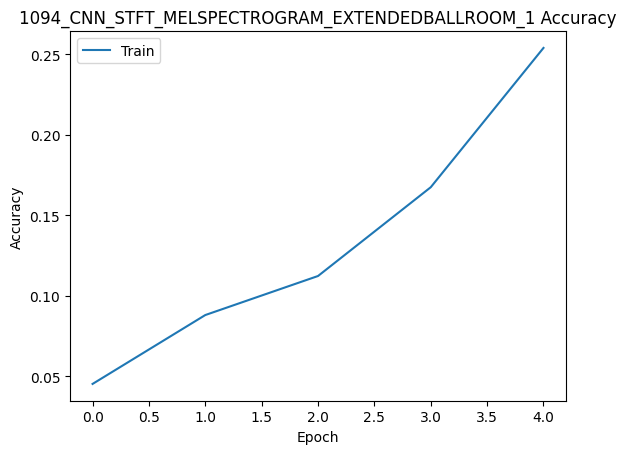

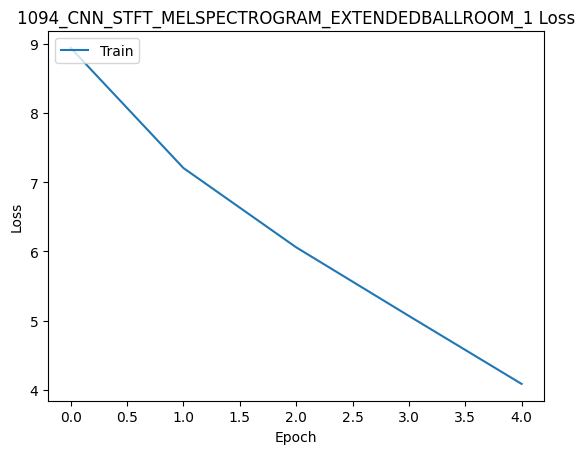

In [ ]:
plot_graph(history, name)

In [ ]:
best_epoch = 5
train_acc, train_loss= get_res(history, best_epoch)
#print(train_acc, val_acc, train_loss, val_loss)

m.load_weights(f'deney1/checkpoints/stft-melspectrogram-{best_epoch:02d}.hdf5') # gets the best model weights

In [ ]:
train = m.evaluate([X_train1, X_train2], Y_train1)
print("Train Loss:", train[0])
print("Train Accuracy:", train[1])
test = m.evaluate([X_test1, X_test2], Y_test1)
print("Test Loss:", test[0])
print("Test Accuracy:", test[1])

66/66 [==============================] - 75s 1s/step - loss: 5.3219 - categorical_accuracy: 0.0718
Train Loss: 5.321883678436279
Train Accuracy: 0.07180218398571014
18/18 [==============================] - 16s 911ms/step - loss: 5.2925 - categorical_accuracy: 0.0674
Test Loss: 5.292482376098633
Test Accuracy: 0.06739526242017746


In [ ]:
m.save(f'/content/deney1/models/{name}.h5') # save model
# save stats of model

#### Classical

In [ ]:
classifiers = ['lr', 'rf', 'svm']
#classifiers = ['knn'] # takes too long -- takes up too much memory
for classifier in classifiers:
    # Get Features and Models
    split = 1
    mod = 'CNN'
    dat = 'ExtendedBallroom' # for name, cant have space
    DATA = "Extended Ballroom" # to get feature
    uid =  np.random.randint(1, 10000) # 'unique' id
    print(uid)
    while sum([x.startswith(str(uid)) for x in os.listdir('/content/deney1/models/')]) != 0: # if duplicate
        uid = np.random.randint(1, 10000)
        print(uid)

    feat1 = 'stft'
    model1 = get_model(mod, dat, feat1, split)
    X_train1, X_test1, Y_train1, Y_test1 = getFeatures(feat1, split)

    feat2 = 'melspectrogram'
    model2 = get_model(mod, dat, feat2, split)
    X_train2, X_test2, Y_train2, Y_test2 = getFeatures(feat2, split)

    name = '_'.join([x.upper() for x in [str(uid), mod, feat1, feat2, classifier, dat, str(split)]])
    
    # training
    pm, test_acc, train_acc, val_acc = classical_parallel_model(model1, X_train1, X_test1, Y_train1, Y_test1,
                                                                model2, X_train2, X_test2, Y_train2, Y_test2,
                                                                EXTENDED_BALLROOM['nGenres'], name, classifier)
    
    joblib.dump(pm, f'/content/deney1/models/{name}.pkl') # save model
    # save stats of model
    cur_mod_stats = pd.DataFrame([[name, mod + " + " + classifier.upper(), dat, ', '.join([feat1, feat2]), split, 
                                   test_acc, None, train_acc, None,
                                 None, val_acc, None, None, None]], columns = MODEL_COLS)
    cur_mod_stats.to_csv('/content/deney1/models/models.csv', mode = 'a', header = False, index = False)

## MFCC + MELSPECTROGRAM

![MFCC](images/MFCC.png)
![MELSPECTROGRAM](images/MELSPECTROGRAM.png)

### Extended Ballroom

In [ ]:
# Get Features and Models
split = 1
mod = 'CNN'
dat = 'ExtendedBallroom' # for name, cant have space
DATA = "Extended Ballroom" # to get feature
uid = np.random.randint(1, 10000) # 'unique' id
while sum([x.startswith(str(uid)) for x in os.listdir('/content/deney1/models/')]) != 0: # if duplicate
    uid = np.random.randint(1, 10000)
    
feat1 = 'mfcc'
model1 = get_model(mod, dat, feat1, split)
X_train1, X_test1, Y_train1, Y_test1 = getFeatures(feat1, split)

feat2 = 'melspectrogram'
model2 = get_model(mod, dat, feat2, split)
X_train2, X_test2, Y_train2, Y_test2 = getFeatures(feat2, split)
# Ytest_1, Y_test2 are equal, same with train

name = '_'.join([x.upper() for x in [str(uid), mod, feat1, feat2, dat, str(split)]])

#### Base

In [ ]:
m = parallel_model(model1, model2, EXTENDED_BALLROOM['nGenres'], name)
opt = keras.optimizers.Adam(lr = 0.001)
m.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ['categorical_accuracy'])
m.summary()

Model: "1717_CNN_MFCC_MELSPECTROGRAM_EXTENDEDBALLROOM_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2_0 (InputLayer)         [(None, 20, 60, 1)]  0           []                               
                                                                                                  
 conv2d_5_1 (Conv2D)            (None, 20, 60, 32)   320         ['input_2_0[0][0]']              
                                                                                                  
 batch_normalization_5_2 (Batch  (None, 20, 60, 32)  128         ['conv2d_5_1[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_5_3 (Activation)    (None, 20, 60, 32)  

In [ ]:
time_callback=[TRA()]
checkpoint_path = 'deney1/checkpoints/mfcc-melspectrogram-{epoch:02d}.hdf5'
history = m.fit([X_train1, X_train2], Y_train1, epochs = 5, batch_size = BATCH_SIZE,
     callbacks = [ModelCheckpoint(filepath = checkpoint_path, save_weights_only = False), time_callback])

Epoch 1/5
33/33 [==============================] - 30s 677ms/step - loss: 7.7528 - categorical_accuracy: 0.0409
Epoch 2/5
33/33 [==============================] - 19s 582ms/step - loss: 6.3373 - categorical_accuracy: 0.0571
Epoch 3/5
33/33 [==============================] - 22s 674ms/step - loss: 5.5598 - categorical_accuracy: 0.0604
Epoch 4/5
33/33 [==============================] - 20s 613ms/step - loss: 4.9871 - categorical_accuracy: 0.0804
Epoch 5/5
33/33 [==============================] - 21s 637ms/step - loss: 4.4242 - categorical_accuracy: 0.1065
Training total time: 0.0 hours, 1.0 minutes, 51.99 seconds)


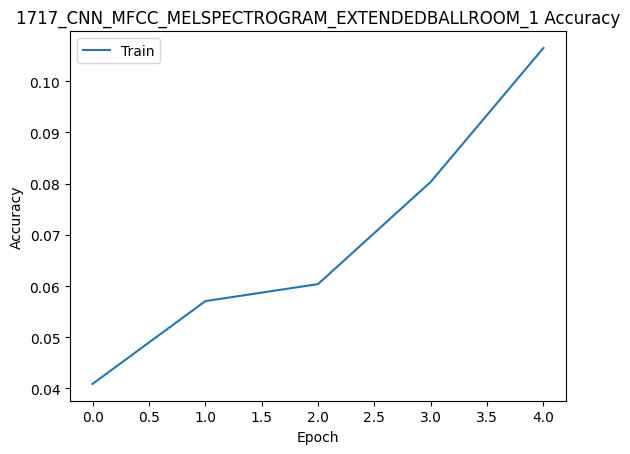

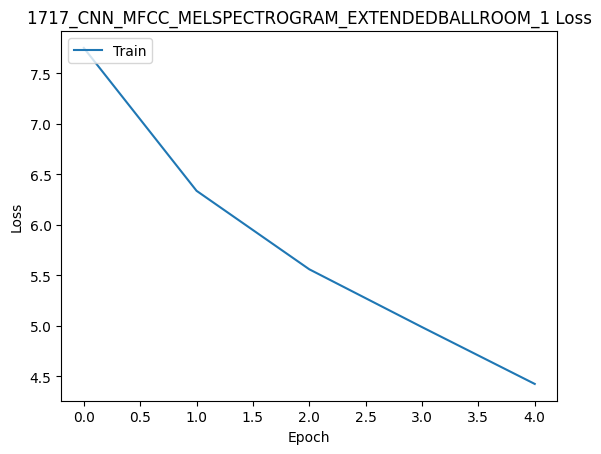

In [ ]:
plot_graph(history, name)

In [ ]:
best_epoch = 5
train_acc, train_loss= get_res(history, best_epoch)
#print(train_acc, val_acc, train_loss, val_loss)

m.load_weights(f'deney1/checkpoints/mfcc-melspectrogram-{best_epoch:02d}.hdf5') # gets the best model weights

In [ ]:
train = m.evaluate([X_train1, X_train2], Y_train1)
print("Train Loss:", train[0])
print("Train Accuracy:", train[1])
test = m.evaluate([X_test1, X_test2], Y_test1)
print("Test Loss:", test[0])
print("Test Accuracy:", test[1])

66/66 [==============================] - 11s 155ms/step - loss: 3.9938 - categorical_accuracy: 0.2235
Train Loss: 3.9937922954559326
Train Accuracy: 0.22349025309085846
18/18 [==============================] - 2s 90ms/step - loss: 4.0020 - categorical_accuracy: 0.2004
Test Loss: 4.002039432525635
Test Accuracy: 0.20036429166793823


In [ ]:
m.save(f'/content/deney1/models/{name}.h5') # save model
# save stats of model
cur_mod_stats = pd.DataFrame([[name, mod, dat, ', '.join([feat1, feat2]), split, test[1], test[0], train[1], train[0],
                             best_epoch, train_acc, train_loss]], columns = MODEL_COLS)
cur_mod_stats.to_csv('/content/deney1/models.csv', mode = 'a', header = False, index = False)

#### Classical

In [ ]:
classifiers = ['svm']
#classifiers=['knn'] takes too long
for classifier in classifiers:
    # Get Features and Models
    split = 1
    mod = 'CNN'
    dat = 'ExtendedBallroom' # for name, cant have space
    DATA = "Extended Ballroom" # to get feature
    uid = np.random.randint(1, 10000) # 'unique' id
    while sum([x.startswith(str(uid)) for x in os.listdir('/content/deney1/models/')]) != 0: # if duplicate
        uid = np.random.randint(1, 10000)

    feat1 = 'mfcc'
    model1 = get_model(mod, dat, feat1, split)
    X_train1, X_test1, Y_train1, Y_test1 = getFeatures(feat1, split)

    feat2 = 'melspectrogram'
    model2 = get_model(mod, dat, feat2, split)
    X_train2, X_test2, Y_train2, Y_test2 = getFeatures(feat2, split)

    name = '_'.join([x.upper() for x in [str(uid), mod, feat1, feat2, classifier, dat, str(split)]])
    
    # training
    pm, test_acc, train_acc= classical_parallel_model(model1, X_train1, X_test1, Y_train1, Y_test1,
                                                                model2, X_train2, X_test2, Y_train2, Y_test2,
                                                                EXTENDED_BALLROOM['nGenres'], name, classifier)
    
    joblib.dump(pm, f'/content/deney1/models/{name}.pkl') # save model
    # save stats of model
    cur_mod_stats = pd.DataFrame([[name, mod + " + " + classifier.upper(), dat, ', '.join([feat1, feat2]), split, 
                                   test_acc, None, train_acc, None,
                                 None, None, None, None]], columns = MODEL_COLS)
    cur_mod_stats.to_csv('/content/deney1/models.csv', mode = 'a', header = False, index = False)

18/18 [==============================] - 1s 40ms/step
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


## Final Results

In [ ]:
name = '1477_CNN_STFT_MFCC_LR_EXTENDEDBALLROOM_1'
model = joblib.load(f'/content/models/{name}.pkl')
model_df = pd.DataFrame(model.cv_results_)
model_df.sort_values(by = ['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__C,param_algo__max_iter,param_algo__penalty,param_algo__solver,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.294412,0.080152,0.007267,0.005745,0.1,500,l2,lbfgs,"{'algo__C': 0.1, 'algo__max_iter': 500, 'algo_...",0.333333,...,0.5,1.0,1.0,1.0,1.0,0.5,0.5,0.783333,0.269258,1
1,0.361264,0.032122,0.003549,0.002773,0.25,500,l2,lbfgs,"{'algo__C': 0.25, 'algo__max_iter': 500, 'algo...",0.333333,...,0.5,1.0,1.0,1.0,1.0,0.5,0.5,0.783333,0.269258,1
2,0.332204,0.072958,0.006043,0.005226,0.5,500,l2,lbfgs,"{'algo__C': 0.5, 'algo__max_iter': 500, 'algo_...",0.333333,...,0.5,1.0,1.0,1.0,1.0,0.5,0.5,0.783333,0.269258,1


Keep in mind, for some models, KNN has NaN values for split test scores and validation accuracy for reasons I am not sure of. Probably due to memory issues? Ex. 5201_CNN_STFT_MFCC_KNN_EXTENDEDBALLROOM_8, 8311_CNN_STFT_MELSPECTROGRAM_KNN_EXTENDEDBALLROOM_8, 1288_CNN_MFCC_MELSPECTROGRAM_KNN_EXTENDEDBALLROOM_8

So the KNN models, at least for the models specified above, do not have the best possible accuracy.

In [ ]:
MODELS_PATH = os.path.join(os.getcwd(), '/content/models', 'models.csv')
MODELS = pd.read_csv(MODELS_PATH).set_index("Model Name")
MODELS = MODELS.sort_values('Test Accuracy', ascending = False)
MODELS = MODELS[MODELS['Split'].isin([5, 8, 10])]
MODELS

,Method,Dataset,Feature,Split,Test Accuracy,Test Loss,Train Accuracy,Train Loss,Best Epoch,Validation Accuracy,Validation Loss,Training Accuracy,Training Loss
Model Name,,,,,,,,,,,,,


1/1 [==============================] - 0s 140ms/step


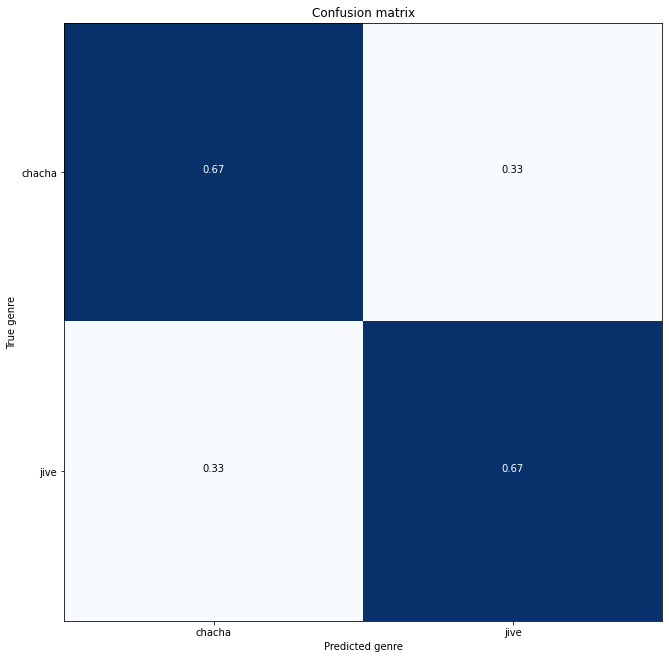

In [ ]:
# STFT MFCC
split = 4
mod = 'CNN'
dat = 'ExtendedBallroom' # for name, cant have space
DATA = "Extended Ballroom" # to get feature

feat1 = 'stft'
model1 = get_model(mod, dat, feat1, split)
X_train1, X_test1, Y_train1, Y_test1 = getFeatures(DATA, feat1, split)
del X_train1, Y_train1

feat2 = 'mfcc'
model2 = get_model(mod, dat, feat2, split)
X_train2, X_test2, Y_train2, Y_test2 = getFeatures(DATA, feat2, split)
del X_train2, Y_train2

m1_layer = [l.output for l in model1.layers if type(l) == Flatten][0]
m2_layer = [l.output for l in model2.layers if type(l) == Flatten][0]
m1 = Model(inputs = model1.input, outputs = m1_layer)
m2 = Model(inputs = model2.input, outputs = m2_layer)

# feature extraction
m1_output = m1.predict(X_test1)
m2_output = m2.predict(X_test2)
X_test = np.column_stack((m1_output, m2_output)) # concatenation

model_name = '6983_CNN_STFT_MFCC_SVM_EXTENDEDBALLROOM_1'
model = joblib.load(f'/content/models/{model_name}.pkl')

preds = model.predict(X_test)
cm = confusion_matrix(y_true = Y_test1.argmax(axis = 1), y_pred = preds)
cnf_matrix(cm, EXTENDED_BALLROOM['genres'], name = model_name)

TEST AŞAMASI

In [ ]:
import os
import pandas as pd
from IPython.display import YouTubeVideo
from __future__ import unicode_literals
import shutil
import librosa
import librosa.display
import numpy as np
import keras
import joblib
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

İlk önce demo_songs adında boş klasör oluşturmalıyız. Input olarak verilen sesin özellikleri buraya kaydedilir.

In [ ]:
MODELS_PATH =   '/content/models/models.csv'  #os.path.join(os.getcwd(), 'models', 'models.csv')
MODELS = pd.read_csv(MODELS_PATH).set_index("Model Name")
MODELS = MODELS.sort_values('Test Accuracy', ascending = False)
MODELS = MODELS[MODELS['Split'].isin([5, 8, 10])]
MODELS

,Method,Dataset,Feature,Split,Test Accuracy,Test Loss,Train Accuracy,Train Loss,Best Epoch,Validation Accuracy,Validation Loss,Training Accuracy,Training Loss
Model Name,,,,,,,,,,,,,


## Testing

In [ ]:
def process(name, time_split, file_type, verbose = False, save = False):
    N_FFT = 2048
    HOP_LENGTH = 1024
    N_MELS = 64
    N_MFCC = 13

    aud_path = os.path.join(os.getcwd(), "demo_songs", name)
    if not os.path.exists(aud_path):
        print("Video Demo not found:", aud_path)
        return
        
    features = ("stft","mfcc")
    
    audio_path = os.path.join(aud_path, name + file_type)
    y, sr = librosa.load(audio_path) # can user offset and duration for 5 second intervals
    
    for feature in features:
        processed = []
        
        if feature == "stft":
            feat = np.abs(librosa.stft(y, hop_length = HOP_LENGTH, n_fft = N_FFT))
        elif feature == "mfcc":
            feat = librosa.feature.mfcc(y = y, sr = sr, hop_length = HOP_LENGTH, 
                                                  n_fft = N_FFT)
        elif feature == "melspectrogram":
            feat = librosa.feature.melspectrogram(y = y, sr = sr, n_mels = N_MELS, n_fft = N_FFT,
                                                 hop_length = HOP_LENGTH)
        feat = librosa.power_to_db(feat ** 2) # feat ** 2 for amplitude to db
        
        # find max length that is //10, 8, 5, 4, 2
        max_len = 2
        for i in range(feat.shape[1], 2, -1):
            if i % 640 == 0:
                max_len = i
                break
                
        out = feat[:, :max_len] # should be //10, 8, 5, 4, 2 while almost being close to max length
        
        t_split = np.hsplit(out, max_len // 640) # split so 640 length each
        for t in t_split:
            out_split = np.hsplit(t, time_split)
            for split in out_split:
                processed.append(split)
                #librosa.display.specshow(split[:, :], sr=sr, hop_length = HOP_LENGTH, x_axis = 'time', y_axis = 'mel')
            #librosa.display.specshow(out[:, :], sr=sr, hop_length = HOP_LENGTH)
            
        X = np.array(processed)
        np.save(os.path.join(aud_path, f"{feature + str(time_split)}.npy"), X)

In [ ]:
def get_feat(video, feat, split):
    feat = feat.lower()
    X = np.load(os.path.join(os.getcwd(), "demo_songs", video, f"{feat}{split}.npy"))
    
    return X

In [ ]:
def get_model(mod, data, feature, split):
    models_path = os.path.join(os.getcwd(), '/content/models')
    for file in os.listdir(models_path):
        if file.endswith('_'.join([mod, feature.upper(), data.upper(), str(split)]) + '.h5'):
            model = keras.models.load_model(os.path.join(models_path, file))
            print(os.path.join(models_path, file))
            break
    #if feature=='MFCC':
      #model = keras.models.load_model('/content/drive/MyDrive/datasets/models/5748_CNN_MFCC_EXTENDEDBALLROOM_1.h5')
    #if feature=='STFT':
      #model = keras.models.load_model('/content/drive/MyDrive/datasets/models/3767_CNN_STFT_EXTENDEDBALLROOM_1.h5')
    return model

In [ ]:
class MyLogger(object):
    def debug(self, msg):
        pass

    def warning(self, msg):
        pass

    def error(self, msg):
        print(msg)


def my_hook(d):
    if d['status'] == 'finished':
        print('Done downloading, now converting ...')

ydl_opts = {
    'format': 'bestaudio/best',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192',
    }],
    'logger': MyLogger(),
    'progress_hooks': [my_hook],
}

In [ ]:
#GTZAN_GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
#EXTENDED_BALLROOM_GENRES = ['chacha', 'foxtrot', 'jive', 'quickstep', 'rumba', 'samba', 'tango', 'viennesewaltz', 'waltz']
EXTENDED_BALLROOM_GENRES = ['chacha','quickstep','waltz','tango']

### Download

In [ ]:
name = 'TJ'
for file in os.listdir(os.getcwd()):
    if file.endswith('.mp3'):
        file_type = '.mp3'
        os.path.isdir(f'demo_songs/{name}') or os.mkdir(f'demo_songs/{name}')
        shutil.move(file, f'demo_songs/{name}/{name}.mp3')
    if file.endswith('.wav'):
        file_type = '.wav'
        os.path.isdir(f'demo_songs/{name}') or os.mkdir(f'demo_songs/{name}')
        shutil.move(file, f'demo_songs/{name}/{name}.wav')
        
# spectograms + splitting
process(name, 1, file_type) # 8 split

## Extended Ballroom

La canzone di Marinella = zbNkLDOhxpc

Tom and Jerry = xpAjbaNBPqA

### Prediction

In [ ]:
# video name
name = 'TJ'

# load model
data = 'EXTENDEDBALLROOM'
b_mod = 'CNN'
split = 4
feat1 = 'STFT'
feat2 = 'MFCC'
model1 = get_model(b_mod, data, feat1, split)
model2 = get_model(b_mod, data, feat2, split)

#model_name = '757_CNN_STFT_MFCC_SVM_EXTENDEDBALLROOM_8'
model = joblib.load(f'/content/models/4834_CNN_STFT_MFCC_SVM_EXTENDEDBALLROOM_1.pkl')

# use spectrograms to determine genre
m1_layer = [l.output for l in model1.layers if type(l) == Flatten][0]
m2_layer = [l.output for l in model2.layers if type(l) == Flatten][0]
m1 = Model(inputs = model1.input, outputs = m1_layer)
m2 = Model(inputs = model2.input, outputs = m2_layer)

# feature extraction
feat1_x = get_feat(name, 'stft', split)
feat2_x = get_feat(name, 'mfcc', split)

m1_output = m1.predict(feat1_x)
m2_output = m2.predict(feat2_x)
output_features = np.column_stack((m1_output, m2_output)) # concatenation

PREDICTIONS = model.predict(output_features)

# majority voting
GENRES = {}
gens = []
for pred in PREDICTIONS:
    if EXTENDED_BALLROOM_GENRES[pred] in GENRES:
        GENRES[EXTENDED_BALLROOM_GENRES[pred]] += 1
    else:
        GENRES[EXTENDED_BALLROOM_GENRES[pred]] = 1
    gens.append(EXTENDED_BALLROOM_GENRES[pred])
print(gens, "\n")

print("Summary:")
print(GENRES, "\n")

predicted_genre = max(GENRES, key = GENRES.get)
print("Predicted:", predicted_genre)

/content/drive/MyDrive/datasets/models/3767_CNN_STFT_EXTENDEDBALLROOM_1.h5
/content/drive/MyDrive/datasets/models/5748_CNN_MFCC_EXTENDEDBALLROOM_1.h5
1/1 [==============================] - 0s 102ms/step
['chacha'] 

Summary:
{'chacha': 1} 

Predicted: chacha


# DENEY 2

source:https://bitbucket.org/xphongvn/ballroommusicclassify/src/master/


pdf:https://www.researchgate.net/publication/336902727_End-to-end_Classification_of_Ballroom_Dancing_Music_Using_Machine_Learning

link: /usr/local/lib/python3.10/dist-packages/madmom/processors.py

## ÖNEMLİ NOT !!!!!: 
Defteri çalıştırmadan önce ilk olarak aşağıdaki madmom kütüphanesini kurun ve yukaridaki linki açın ve 23.satırdakini şununla değiştirin

"from collections.abc import MutableSequence"

Sonrasında diğer hücreleri çalıştırabilirsiniz.

In [9]:
pip install madmom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 6.3 MB/s eta 0:00:00
  Created wheel for madmom: filename=madmom-0.16.1-cp310-cp310-linux_x86_64.whl size=21508999 sha256=8eb2e3c0c4c4cf224ff27c0f8cd78128395961ebabf9d623aa989067bbe7710c
  Stored in directory: /root/.cache/pip/wheels/87/18/20/105f9248e5f504f5ab190338516558cacaf6d5d7fadd5e7947
Successfully built madmom


In [10]:
pip install GitPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00


In [ ]:
from git.repo.base import Repo
Repo.clone_from("https://github.com/Yasinkrynk/pyAudioAnalysis.git","pyAudioAnalysis")

<git.repo.base.Repo '/content/pyAudioAnalysis/.git'>

In [ ]:
pip install eyed3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 16.1 MB/s eta 0:00:00


## CUT DOWN DATA

In [ ]:
from pydub import AudioSegment
import os
from tqdm import tqdm
tqdm.monitor_interval = 0

FIXED_WINDOWS_TO_CUT = 10 *1000 # cut 10 second windows
OVERLAP = 5 *1000 # define the 5 seconds overlap

def cut(folder_name_in, folder_name_out):
    # choose a folder as an input file
    list_of_dir = os.listdir(folder_name_in)
    if ".DS_Store" in list_of_dir:
        list_of_dir.remove(".DS_Store")

    # create a folder for the output files if it doesn't exist
    check_dir = folder_name_out
    if not os.path.isdir(check_dir):
        os.mkdir(check_dir)

    # prepare all the folders in the output folder
    for dir in list_of_dir:
        check_dir = folder_name_out + dir
        if not os.path.isdir(check_dir):
            os.mkdir(check_dir)

    # for each of the input files, cut into 10 second intervals
    for dir in list_of_dir:
        folder_to_convert = folder_name_in + dir
        files_to_convert = os.listdir(folder_to_convert)

        try:
            files_to_convert.remove(".DS_Store") # try to remove the meta folder
        except:
            pass

        folder_to_save = folder_name_out + dir
        print(folder_to_save)
        for filename in tqdm(files_to_convert):
            try:
                sound = AudioSegment.from_file(folder_to_convert + "/" + filename) # read the whole song
                # determine how many chunks you will cut the song into
                iterations = int(sound.duration_seconds*1000/(FIXED_WINDOWS_TO_CUT-OVERLAP))
                for i in range(iterations):
                    start = i * (FIXED_WINDOWS_TO_CUT-OVERLAP) # determine the start and end
                    end = start + FIXED_WINDOWS_TO_CUT
                    song_10_seconds = sound[start:end]
                    song_10_seconds.export(folder_to_save + "/" + filename + "_" + str(i) +".wav", format="wav")
            except:
                print("Error in " + filename)



cut(folder_name_in = "/content/train/", folder_name_out = "deney2/music_sample_chunks_train/")
cut(folder_name_in = "/content/test/", folder_name_out = "deney2/music_sample_chunks_test/")

deney2/music_sample_chunks_train/67_rhy1


100%|██████████| 57/57 [00:00<00:00, 2117.32it/s]


deney2/music_sample_chunks_train/69_rhy2


100%|██████████| 55/55 [00:00<00:00, 789.93it/s]


deney2/music_sample_chunks_train/64_rhy1


100%|██████████| 37/37 [00:00<00:00, 1306.96it/s]


deney2/music_sample_chunks_train/68_rhy1


100%|██████████| 44/44 [00:00<00:00, 1604.57it/s]


deney2/music_sample_chunks_train/66_rhy2


100%|██████████| 56/56 [00:00<00:00, 770.30it/s]


deney2/music_sample_chunks_train/66_rhy1


100%|██████████| 41/41 [00:00<00:00, 3514.18it/s]


deney2/music_sample_chunks_train/56_rhy1


100%|██████████| 57/57 [00:00<00:00, 2428.59it/s]


deney2/music_sample_chunks_train/65_rhy1


100%|██████████| 41/41 [00:00<00:00, 2834.04it/s]


deney2/music_sample_chunks_train/69_rhy1


100%|██████████| 55/55 [00:00<00:00, 1872.99it/s]


deney2/music_sample_chunks_train/53_rhy2


100%|██████████| 56/56 [00:00<00:00, 1431.52it/s]


deney2/music_sample_chunks_train/54_rhy1


100%|██████████| 59/59 [00:00<00:00, 2482.98it/s]


deney2/music_sample_chunks_train/51_rhy1


100%|██████████| 38/38 [00:00<00:00, 791.20it/s]


deney2/music_sample_chunks_train/56_rhy2


100%|██████████| 76/76 [00:00<00:00, 3321.42it/s]


deney2/music_sample_chunks_train/62_rhy1


100%|██████████| 45/45 [00:00<00:00, 899.71it/s]


deney2/music_sample_chunks_train/53_rhy1


100%|██████████| 42/42 [00:00<00:00, 2184.75it/s]


deney2/music_sample_chunks_train/55_rhy1


100%|██████████| 142/142 [00:00<00:00, 1103.58it/s]


deney2/music_sample_chunks_train/62_rhy2


100%|██████████| 48/48 [00:00<00:00, 984.26it/s]


deney2/music_sample_chunks_train/610_rhy2


100%|██████████| 33/33 [00:00<00:00, 1166.40it/s]


deney2/music_sample_chunks_train/64_rhy2


100%|██████████| 34/34 [00:00<00:00, 874.65it/s]


deney2/music_sample_chunks_train/61_rhy1


100%|██████████| 37/37 [00:00<00:00, 1286.79it/s]


deney2/music_sample_chunks_train/61_rhy2


100%|██████████| 34/34 [00:00<00:00, 959.60it/s]


deney2/music_sample_chunks_train/57_rhy1


100%|██████████| 38/38 [00:00<00:00, 1412.06it/s]


deney2/music_sample_chunks_train/52_rhy2


100%|██████████| 64/64 [00:00<00:00, 938.83it/s]


deney2/music_sample_chunks_train/51_rhy2


100%|██████████| 82/82 [00:00<00:00, 629.50it/s]


deney2/music_sample_chunks_train/67_rhy2


100%|██████████| 51/51 [00:00<00:00, 589.84it/s]


deney2/music_sample_chunks_train/52_rhy1


100%|██████████| 59/59 [00:00<00:00, 680.48it/s]


deney2/music_sample_chunks_train/59_rhy2


100%|██████████| 53/53 [00:00<00:00, 334.49it/s]


deney2/music_sample_chunks_train/510_rhy2


100%|██████████| 85/85 [00:00<00:00, 1429.25it/s]


deney2/music_sample_chunks_train/610_rhy1


100%|██████████| 28/28 [00:00<00:00, 1314.55it/s]


deney2/music_sample_chunks_train/65_rhy2


100%|██████████| 52/52 [00:00<00:00, 824.40it/s]


deney2/music_sample_chunks_train/57_rhy2


100%|██████████| 55/55 [00:00<00:00, 1926.10it/s]


deney2/music_sample_chunks_train/59_rhy1


100%|██████████| 38/38 [00:00<00:00, 1112.00it/s]


deney2/music_sample_chunks_train/58_rhy1


100%|██████████| 48/48 [00:00<00:00, 1897.73it/s]


deney2/music_sample_chunks_train/63_rhy2


100%|██████████| 78/78 [00:00<00:00, 1278.34it/s]


deney2/music_sample_chunks_train/63_rhy1


100%|██████████| 72/72 [00:00<00:00, 2938.50it/s]


deney2/music_sample_chunks_train/54_rhy2


100%|██████████| 36/36 [00:00<00:00, 1899.52it/s]


deney2/music_sample_chunks_train/55_rhy2


100%|██████████| 71/71 [00:00<00:00, 2409.23it/s]


deney2/music_sample_chunks_train/58_rhy2


100%|██████████| 61/61 [00:00<00:00, 1609.60it/s]


deney2/music_sample_chunks_train/68_rhy2


100%|██████████| 45/45 [00:00<00:00, 1415.80it/s]


deney2/music_sample_chunks_test/67_rhy1


100%|██████████| 15/15 [00:00<00:00, 1889.04it/s]


deney2/music_sample_chunks_test/69_rhy2


100%|██████████| 14/14 [00:00<00:00, 1017.61it/s]


deney2/music_sample_chunks_test/64_rhy1


100%|██████████| 10/10 [00:00<00:00, 3213.53it/s]


deney2/music_sample_chunks_test/68_rhy1


100%|██████████| 12/12 [00:00<00:00, 3473.78it/s]


deney2/music_sample_chunks_test/66_rhy2


100%|██████████| 15/15 [00:00<00:00, 980.19it/s]


deney2/music_sample_chunks_test/66_rhy1


100%|██████████| 11/11 [00:00<00:00, 3665.18it/s]


deney2/music_sample_chunks_test/56_rhy1


100%|██████████| 15/15 [00:00<00:00, 2607.86it/s]


deney2/music_sample_chunks_test/65_rhy1


100%|██████████| 11/11 [00:00<00:00, 3559.43it/s]


deney2/music_sample_chunks_test/69_rhy1


100%|██████████| 14/14 [00:00<00:00, 2771.92it/s]


deney2/music_sample_chunks_test/53_rhy2


100%|██████████| 14/14 [00:00<00:00, 403.50it/s]


deney2/music_sample_chunks_test/54_rhy1


100%|██████████| 15/15 [00:00<00:00, 3413.52it/s]


deney2/music_sample_chunks_test/51_rhy1


100%|██████████| 10/10 [00:00<00:00, 801.13it/s]


deney2/music_sample_chunks_test/56_rhy2


100%|██████████| 20/20 [00:00<00:00, 3743.58it/s]


deney2/music_sample_chunks_test/62_rhy1


100%|██████████| 12/12 [00:00<00:00, 2638.76it/s]


deney2/music_sample_chunks_test/53_rhy1


100%|██████████| 11/11 [00:00<00:00, 3547.39it/s]


deney2/music_sample_chunks_test/55_rhy1


100%|██████████| 36/36 [00:00<00:00, 1298.87it/s]


deney2/music_sample_chunks_test/62_rhy2


100%|██████████| 13/13 [00:00<00:00, 956.29it/s]


deney2/music_sample_chunks_test/610_rhy2


100%|██████████| 9/9 [00:00<00:00, 855.71it/s]


deney2/music_sample_chunks_test/64_rhy2


100%|██████████| 9/9 [00:00<00:00, 813.59it/s]


deney2/music_sample_chunks_test/61_rhy1


100%|██████████| 10/10 [00:00<00:00, 1976.77it/s]


deney2/music_sample_chunks_test/61_rhy2


100%|██████████| 9/9 [00:00<00:00, 1071.65it/s]


deney2/music_sample_chunks_test/57_rhy1


100%|██████████| 10/10 [00:00<00:00, 3448.41it/s]


deney2/music_sample_chunks_test/52_rhy2


100%|██████████| 17/17 [00:00<00:00, 890.59it/s]


deney2/music_sample_chunks_test/51_rhy2


100%|██████████| 21/21 [00:00<00:00, 2310.85it/s]


deney2/music_sample_chunks_test/67_rhy2


100%|██████████| 13/13 [00:00<00:00, 1842.40it/s]


deney2/music_sample_chunks_test/52_rhy1


100%|██████████| 15/15 [00:00<00:00, 886.80it/s]


deney2/music_sample_chunks_test/59_rhy2


100%|██████████| 14/14 [00:00<00:00, 569.02it/s]


deney2/music_sample_chunks_test/510_rhy2


100%|██████████| 22/22 [00:00<00:00, 2418.35it/s]


deney2/music_sample_chunks_test/610_rhy1


100%|██████████| 8/8 [00:00<00:00, 1808.38it/s]


deney2/music_sample_chunks_test/65_rhy2


100%|██████████| 14/14 [00:00<00:00, 707.85it/s]


deney2/music_sample_chunks_test/57_rhy2


100%|██████████| 14/14 [00:00<00:00, 1186.36it/s]


deney2/music_sample_chunks_test/59_rhy1


100%|██████████| 10/10 [00:00<00:00, 1056.95it/s]


deney2/music_sample_chunks_test/58_rhy1


100%|██████████| 13/13 [00:00<00:00, 1624.68it/s]


deney2/music_sample_chunks_test/63_rhy2


100%|██████████| 20/20 [00:00<00:00, 708.12it/s]


deney2/music_sample_chunks_test/63_rhy1


100%|██████████| 18/18 [00:00<00:00, 1323.05it/s]


deney2/music_sample_chunks_test/54_rhy2


100%|██████████| 9/9 [00:00<00:00, 752.84it/s]


deney2/music_sample_chunks_test/55_rhy2


100%|██████████| 18/18 [00:00<00:00, 795.13it/s]


deney2/music_sample_chunks_test/58_rhy2


100%|██████████| 16/16 [00:00<00:00, 470.96it/s]


deney2/music_sample_chunks_test/68_rhy2


100%|██████████| 12/12 [00:00<00:00, 918.59it/s]


## Feature Extraction

In [ ]:
import madmom
import time
import os
from tqdm import tqdm, tqdm_gui
import numpy as np
import librosa
from scipy.fftpack import fft

tqdm.monitor_interval = 0
RANGE = [30,40,80,120,180,300] # frequency range for fingerprint

# Name of Song,Type of Dance,Count, BPM, maxfreq_30_40, maxfreq_40_80, maxfreq_80_120, maxfreq_120_180, maxfreq_180_300

## Main program ##

# Open a csv and write the title
f = open('deney2/song_features_train.csv', mode = 'w')
f.write("Name of Song,Type of Dance,Count, BPM, maxfreq_30_40, maxfreq_40_80, maxfreq_80_120, maxfreq_120_180, maxfreq_180_300\n")

# Open all wav songs and calculate the bpm and write to the csv file
list_of_dir = os.listdir("/content/deney2/music_sample_chunks_train/")
if ".DS_Store" in list_of_dir:
    list_of_dir.remove(".DS_Store")

for dir in tqdm(list_of_dir):
    folder_path = "/content/deney2/music_sample_chunks_train/" + dir
    file_list = os.listdir(folder_path)
    for file in tqdm(file_list):
        file_path = folder_path + "/" + file
        try:
            ###### Count extraction #####
            proc = madmom.features.DBNDownBeatTrackingProcessor(beats_per_bar=[2, 3, 4], fps=100)
            act = madmom.features.RNNDownBeatProcessor()(file_path)
            count = proc(act)
            max_count = int(count[:,1].max())
            #print("Successfully extracted count feature")

            ##### BPM extraction ######
            data, sr = librosa.load(file_path)
            tempo, beats = librosa.beat.beat_track(y=data, sr=sr)
            #print("Successfully extracted bpm feature")

            ##### Fingerprint extraction ######
            if data.ndim == 2:
                data_sum = data[:, 0] + data[:, 1]
            else:
                data_sum = data
            fft_out = fft(data_sum)
            fft_out = np.abs(fft_out)
            max_ranges = []
            for i in range(len(RANGE) - 1):
                start = i
                end = start + 1
                start_freq = RANGE[start]
                end_freq = RANGE[end]
                max_range = start_freq + np.argmax(fft_out[start_freq:end_freq])
                max_ranges.append(max_range)
                #print("Successfully extracted fingerprint feature from {0} frequency to {1} frequency".format(start_freq,end_freq))

            ##### Write to file #######

            f.write('"'+ file + '"' + "," + dir + "," + str(max_count) + "," + str(tempo) + "," + str(max_ranges[0]) + "," + str(max_ranges[1]) + "," +
                    str(max_ranges[2]) + "," + str(max_ranges[3]) + "," + str(max_ranges[4]) + "\n")
            #print(file + "," + dir + "," + str(max_count) + "," + str(tempo) + "," + str(max_ranges[0]) + "," + str(max_ranges[1]) + "," +
            #        str(max_ranges[2]) + "," + str(max_ranges[3]) + "," + str(max_ranges[4]) + "\n")
        except:
            print("error in file:",file)

f.close()

  0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/madmom/features/downbeats.py:287: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  best = np.argmax(np.asarray(results)[:, 1])

 33%|███▎      | 1/3 [00:16<00:33, 16.89s/it]/usr/local/lib/python3.10/dist-packages/madmom/features/downbeats.py:287: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  best = np.argmax(np.asarray(results)[:, 1])

 13%|█▎        | 5/39 [02:09<15:40, 27.66s/it]
0it [00:00, ?it/s]

 18%|█▊        | 7/39 [02:15<07:58, 14.94s/it]
0it [00:00, ?it/s]

 31%|███  

In [ ]:
import madmom
import time
import os
from tqdm import tqdm, tqdm_gui
import numpy as np
import librosa
from scipy.fftpack import fft

tqdm.monitor_interval = 0
RANGE = [30,40,80,120,180,300] # frequency range for fingerprint

# Name of Song,Type of Dance,Count, BPM, maxfreq_30_40, maxfreq_40_80, maxfreq_80_120, maxfreq_120_180, maxfreq_180_300

## Main program ##

# Open a csv and write the title
f = open('deney2/song_features_test.csv', mode = 'w')
f.write("Name of Song,Type of Dance,Count, BPM, maxfreq_30_40, maxfreq_40_80, maxfreq_80_120, maxfreq_120_180, maxfreq_180_300\n")

# Open all wav songs and calculate the bpm and write to the csv file
list_of_dir = os.listdir("/content/deney2/music_sample_chunks_test/")
if ".DS_Store" in list_of_dir:
    list_of_dir.remove(".DS_Store")

for dir in tqdm(list_of_dir):
    folder_path = "/content/deney2/music_sample_chunks_test/" + dir
    file_list = os.listdir(folder_path)
    for file in tqdm(file_list):
        file_path = folder_path + "/" + file
        try:
            ###### Count extraction #####
            proc = madmom.features.DBNDownBeatTrackingProcessor(beats_per_bar=[2, 3, 4], fps=100)
            act = madmom.features.RNNDownBeatProcessor()(file_path)
            count = proc(act)
            max_count = int(count[:,1].max())
            #print("Successfully extracted count feature")

            ##### BPM extraction ######
            data, sr = librosa.load(file_path)
            tempo, beats = librosa.beat.beat_track(y=data, sr=sr)
            #print("Successfully extracted bpm feature")

            ##### Fingerprint extraction ######
            if data.ndim == 2:
                data_sum = data[:, 0] + data[:, 1]
            else:
                data_sum = data
            fft_out = fft(data_sum)
            fft_out = np.abs(fft_out)
            max_ranges = []
            for i in range(len(RANGE) - 1):
                start = i
                end = start + 1
                start_freq = RANGE[start]
                end_freq = RANGE[end]
                max_range = start_freq + np.argmax(fft_out[start_freq:end_freq])
                max_ranges.append(max_range)
                #print("Successfully extracted fingerprint feature from {0} frequency to {1} frequency".format(start_freq,end_freq))

            ##### Write to file #######

            f.write('"'+ file + '"' + "," + dir + "," + str(max_count) + "," + str(tempo) + "," + str(max_ranges[0]) + "," + str(max_ranges[1]) + "," +
                    str(max_ranges[2]) + "," + str(max_ranges[3]) + "," + str(max_ranges[4]) + "\n")
            #print(file + "," + dir + "," + str(max_count) + "," + str(tempo) + "," + str(max_ranges[0]) + "," + str(max_ranges[1]) + "," +
            #        str(max_ranges[2]) + "," + str(max_ranges[3]) + "," + str(max_ranges[4]) + "\n")
        except:
            print("error in file:",file)

f.close()

  5%|▌         | 2/39 [00:21<07:17, 11.82s/it]
0it [00:00, ?it/s]

0it [00:00, ?it/s]

 13%|█▎        | 5/39 [00:34<03:38,  6.43s/it]
0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

 26%|██▌       | 10/39 [00:50<02:19,  4.82s/it]
0it [00:00, ?it/s]

 31%|███       | 12/39 [00:56<01:57,  4.35s/it]
0it [00:00, ?it/s]

 36%|███▌      | 14/39 [00:58<01:20,  3.23s/it]
0it [00:00, ?it/s]

 54%|█████▍    | 21/39 [01:50<01:43,  5.77s/it]
0it [00:00, ?it/s]

 69%|██████▉   | 27/39 [02:45<02:24, 12.01s/it]
0it [00:00, ?it/s]

0it [00:00, ?it/s]

 87%|████████▋ | 34/39 [03:25<00:38,  7.69s/it]
0it [00:00, ?it/s]

100%|██████████| 39/39 [03:49<00:00,  5.88s/it]


## Feature Extraction Advanced

In [ ]:
import madmom
import time
import os
from tqdm import tqdm
import numpy as np
import librosa
from scipy.fftpack import fft
from pyAudioAnalysis import audioFeatureExtraction

tqdm.monitor_interval = 0
RANGE = [30,40,80,120,180,300] # frequency range for fingerprint

# Name of Song,Type of Dance,Count, BPM, maxfreq_30_40, maxfreq_40_80, maxfreq_80_120, maxfreq_120_180, maxfreq_180_300

# Short-term features name

st_feature_names = ['zcr', 'energy', 'energy_entropy','spectral_centroid','spectral_spread','spectral_entropy',
'spectral_flux','spectral_rolloff','mfcc_1','mfcc_2','mfcc_3','mfcc_4','mfcc_5','mfcc_6','mfcc_7','mfcc_8','mfcc_9',
'mfcc_10','mfcc_11','mfcc_12','mfcc_13','chroma_1','chroma_2','chroma_3','chroma_4','chroma_5','chroma_6','chroma_7',
'chroma_8','chroma_9','chroma_10','chroma_11','chroma_12','chroma_std']

## Main program ##

def extract(file_out, folder_in):
    # Open a csv and write the title
    f = open(file_out, mode = 'w')
    try:
        string_to_write = "Name of Song,Type of Dance,Count, BPM, maxfreq_30_40, maxfreq_40_80, maxfreq_80_120, maxfreq_120_180, maxfreq_180_300"
        for name in st_feature_names:
            column_name_mean = "mean_" + name
            column_name_std = "std_" + name
            string_to_write = string_to_write + ", " + column_name_mean + ", " + column_name_std

        f.write(string_to_write + "\n")

        # Open all wav songs and calculate the bpm and write to the csv file
        list_of_dir = os.listdir(folder_in)
        if ".DS_Store" in list_of_dir:
            list_of_dir.remove(".DS_Store")

        for dir in list_of_dir:
            folder_path = folder_in + dir
            file_list = os.listdir(folder_path)
            for file in tqdm(file_list):
                file_path = folder_path + "/" + file
                try:
                    ###### Count extraction #####
                    proc = madmom.features.DBNDownBeatTrackingProcessor(beats_per_bar=[2, 3, 4], fps=100)
                    act = madmom.features.RNNDownBeatProcessor()(file_path)
                    count = proc(act)
                    max_count = int(count[:,1].max())
                    #print("Successfully extracted count feature")

                    ##### BPM extraction ######
                    data, sr = librosa.load(file_path)
                    tempo, beats = librosa.beat.beat_track(y=data, sr=sr)
                    #print("Successfully extracted bpm feature")

                    ##### Fingerprint extraction ######
                    if data.ndim == 2:
                        data_sum = data[:, 0] + data[:, 1]
                    else:
                        data_sum = data
                    fft_out = fft(data_sum)
                    fft_out = np.abs(fft_out)
                    max_ranges = []
                    for i in range(len(RANGE) - 1):
                        start = i
                        end = start + 1
                        start_freq = RANGE[start]
                        end_freq = RANGE[end]
                        max_range = start_freq + np.argmax(fft_out[start_freq:end_freq])
                        max_ranges.append(max_range)

                    ##### Short-term features and statistic of it (Mid-term) ######
                    # Extract short-term features
                    F, f_names = audioFeatureExtraction.stFeatureExtraction(data, sr, 0.050 * sr, 0.025 * sr)
                    # Extract the stats of short-term features
                    mean_st_features = F.mean(axis=1).reshape(-1)
                    std_st_features = F.std(axis=1).reshape(-1)

                    ##### Write to file #######

                    string_to_write = '"'+ file + '"' + "," + dir + "," + str(max_count) + "," + str(tempo) + \
                                      "," + str(max_ranges[0]) + "," + str(max_ranges[1]) + "," + \
                                      str(max_ranges[2]) + "," + str(max_ranges[3]) + "," + str(max_ranges[4])

                    for index, name in enumerate(f_names):
                        string_to_write = string_to_write + \
                                          "," + str(mean_st_features[index]) + \
                                          "," + str(mean_st_features[index])

                    f.write(string_to_write + "\n")

                except Exception as e:
                    print("error in file:",file, "\n" + str(e))
    except:
        f.close()

    finally:
        f.close()


extract(file_out='deney2/song_features_advanced_train.csv', folder_in="deney2/music_sample_chunks_train/")
extract(file_out='deney2/song_features_advanced_test.csv', folder_in="deney2/music_sample_chunks_test/")

  0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/madmom/features/downbeats.py:287: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  best = np.argmax(np.asarray(results)[:, 1])
100%|██████████| 25/25 [00:59<00:00,  2.37s/it]
0it [00:00, ?it/s]
100%|██████████| 2/2 [00:04<00:00,  2.27s/it]
0it [00:00, ?it/s]
100%|██████████| 22/22 [00:44<00:00,  2.02s/it]
0it [00:00, ?it/s]
100%|██████████| 9/9 [00:19<00:00,  2.13s/it]
0it [00:00, ?it/s]
100%|██████████| 47/47 [01:44<00:00,  2.22s/it]
0it [00:00, ?it/s]
100%|██████████| 9/9 [00:19<00:00,  2.15s/it]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 7/7 [00:14<00:00,  2.12s/it]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 7/7 [00:14<00:00,  2.04s/it]
0it [00:00, ?

## Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        41
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00        15
          17       1.00    

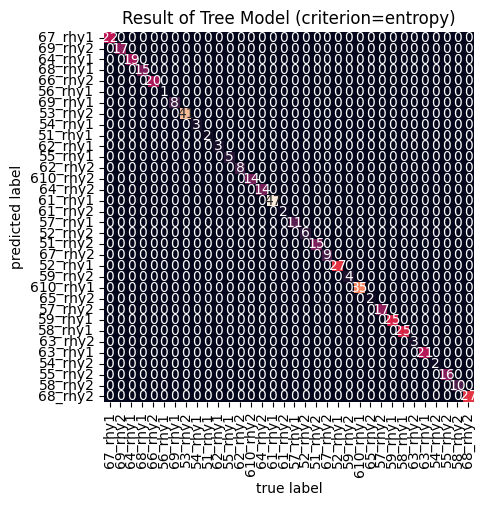

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess

# read the song_features file
fn = "deney2/song_features_train.csv"
df = pd.read_csv(fn)

fn_test = "deney2/song_features_test.csv"
df_test= pd.read_csv(fn)

# convert types of dance into unique integer numbers in order to classify
targets = df["Type of Dance"].unique()
map_to_integer = {dance:n for n, dance in enumerate(targets)}
map_to_labels = {n:dance for n, dance in enumerate(targets)}
df["targets"] = df["Type of Dance"].replace(map_to_integer)

df_test["targets"] = df_test["Type of Dance"].replace(map_to_integer)

# subset the features data
features = list(df.columns[2:9])

# split data into train and test data
X_train=df[features] 
y_train=df['targets']
X_test=df_test[features]
y_test=df_test['targets']

# build the model
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)

# evaluate the model
y_pred = tree.predict(X_test)
# convert y_pred and y_test back into labels
y_test_labels = y_test.replace(map_to_labels)
y_pred_labels = pd.Series(y_pred).replace(map_to_labels)

score = metrics.classification_report(y_test, y_pred)
print(score)


plt.figure()
mat = metrics.confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=targets, yticklabels=targets)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Result of Tree Model (criterion=entropy)')
plt.show()

def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

visualize_tree(tree, features)

## DEEP NEURAL NETWORK MODEL

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               2400      
                                                                 
 dense_1 (Dense)             (None, 250)               75250     
                                                                 
 dense_2 (Dense)             (None, 34)                8534      
                                                                 
Total params: 86,184
Trainable params: 86,184
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
5/5 - 1s - loss: 8.7517 - accuracy: 0.0565 - 1s/epoch - 228ms/step
Epoch 2/10
5/5 - 0s - loss: 4.6306 - accuracy: 0.0665 - 40ms/epoch - 8ms/step
Epoch 3/10
5/5 - 0s - loss: 4.1472 - accuracy: 0.0524 - 36ms/epoch - 7ms/step
Epoch 4/10
5/5 - 0s - loss: 3.7630 - accuracy: 0.1169 - 32ms/epoch - 6ms/step
Epoc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


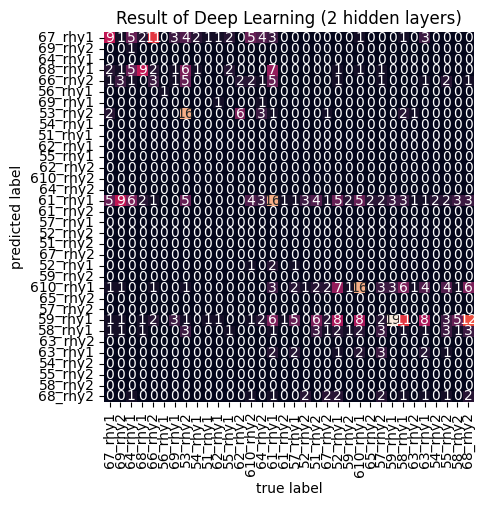

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# read the song_features file
fn = "deney2/song_features_train.csv"
df = pd.read_csv(fn)

fn_test = "deney2/song_features_test.csv"
df_test = pd.read_csv(fn)

# convert types of dance into unique integer numbers in order to classify
targets = df["Type of Dance"].unique()
map_to_integer = {dance:n for n, dance in enumerate(targets)}
map_to_labels = {n:dance for n, dance in enumerate(targets)}
df["targets"] = df["Type of Dance"].replace(map_to_integer)
df_test["targets"] = df_test["Type of Dance"].replace(map_to_integer)

# subset the features data
features = list(df.columns[2:9])

# split data into train and test data
X_train=df[features] 
y_train=df['targets']
X_test=df_test[features]
y_test=df_test['targets']

uniques, ids = np.unique(y_train, return_inverse=True)
y_train = np_utils.to_categorical(ids, len(uniques)) # one hot encoding

# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(300, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(250, kernel_initializer='normal', activation='relu'))
    model.add(Dense(34, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

# build the model
model = baseline_model()
# Fit the model
model.fit(X_train.values, y_train, epochs=10, batch_size=100, verbose=2)

# evaluate the model
y_pred = model.predict(X_test)
# Convert y_pred from One-hot to integer
y_pred = uniques[y_pred.argmax(axis = 1)]


# convert y_pred and y_test back into labels
y_test_labels = pd.Series(y_test).replace(map_to_labels)
y_pred_labels = pd.Series(y_pred).replace(map_to_labels)

score = metrics.classification_report(y_test_labels, y_pred_labels)
print(score)


plt.figure()
mat = metrics.confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=targets, yticklabels=targets)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Result of Deep Learning (2 hidden layers)')
plt.show()

## DEEP NEURAL NETWORK ADVANCED

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 608       
                                                                 
 dense_7 (Dense)             (None, 16)                144       
                                                                 
 dense_8 (Dense)             (None, 34)                578       
                                                                 
Total params: 1,330
Trainable params: 1,330
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 1s - loss: 3.5255 - accuracy: 0.0343 - 1s/epoch - 289ms/step
Epoch 2/100
5/5 - 0s - loss: 3.5208 - accuracy: 0.0504 - 25ms/epoch - 5ms/step
Epoch 3/100
5/5 - 0s - loss: 3.5160 - accuracy: 0.0464 - 25ms/epoch - 5ms/step
Epoch 4/100
5/5 - 0s - loss: 3.5106 - accuracy: 0.0625 - 22ms/epoch - 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


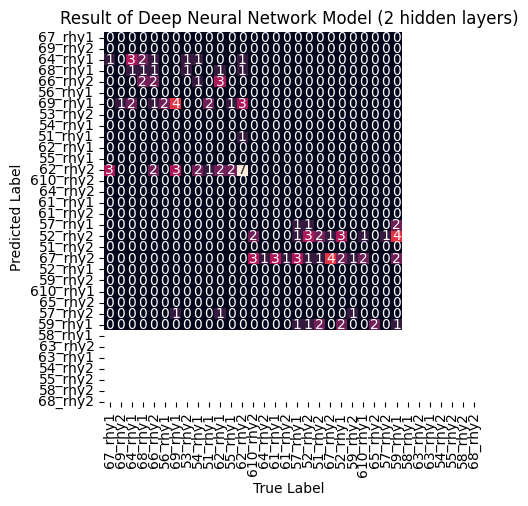

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# read the song_features file
fn_train = "deney2/song_features_advanced_train.csv"
df_train = pd.read_csv(fn_train)
# read the song_features file
fn_test = "deney2/song_features_advanced_test.csv"
df_test = pd.read_csv(fn_test)

# convert types of dance into unique integer numbers in order to classify
targets = df_train["Type of Dance"].unique()
map_to_integer = {dance:n for n, dance in enumerate(targets)}
map_to_labels = {n:dance for n, dance in enumerate(targets)}
targets_column_train = df_train["Type of Dance"].replace(map_to_integer)
targets_column_test = df_test["Type of Dance"].replace(map_to_integer)

# subset the features data
features = list(df_train.columns[2:])

# split data into train and test data
#X_train, X_test, y_train, y_test = train_test_split(df[features], targets_column, test_size=.2, random_state=100)
X_train = df_train[features]
y_train = targets_column_train
X_test = df_test[features]
y_test = targets_column_test

# scale the data (normalise the data into the range 0-1)
scaler = StandardScaler() # initialise the scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler
file_pickle = "deney2/x_scaler.pickle"
with open(file_pickle, 'wb') as f:
    pickle.dump(scaler, f)

uniques, ids = np.unique(y_train, return_inverse=True)
uniques_test, ids_test = np.unique(y_test, return_inverse=True)

y_train = np_utils.to_categorical(ids, len(uniques)) # one hot encoding
y_test_oh = np_utils.to_categorical(ids_test, len(uniques_test)) # one hot encoding

# define baseline model
def baseline_model(no_of_classes):
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=len(features), kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(no_of_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

# build the model
no_of_classes = len(uniques)
model = baseline_model(no_of_classes)
# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=2)
          #, validation_data=(X_test, y_test_oh))

# evaluate the model
y_pred = model.predict(X_test)
# Convert y_pred from One-hot to integer
y_pred = uniques[y_pred.argmax(axis = 1)]


# convert y_pred and y_test back into labels
y_test_labels = pd.Series(y_test).replace(map_to_labels)
y_pred_labels = pd.Series(y_pred).replace(map_to_labels)

score = metrics.classification_report(y_test_labels, y_pred_labels)
print(score)


plt.figure()
mat = metrics.confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=targets, yticklabels=targets)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Result of Deep Neural Network Model (2 hidden layers)')
plt.show()

# Save the model
file_model = "deney2/neural_network.h5"
model.save(file_model)

## KNN MODEL

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.22      0.59      0.32        27
           2       0.33      0.50      0.40         2
           3       0.00      0.00      0.00         2
           4       0.21      0.36      0.26        25
           5       0.00      0.00      0.00         2
           6       0.33      0.40      0.36        10
           7       0.32      0.60      0.42        20
           8       0.50      1.00      0.67         1
           9       0.27      0.41      0.33        22
          10       0.40      0.22      0.29         9
          11       0.54      0.73      0.62        41
          12       0.26      0.37      0.30        27
          13       0.50      0.27      0.35        11
          14       0.43      0.35      0.39        17
          15       1.00      0.17      0.29         6
          16       0.50      0.13      0.21        15
          17       0.00    

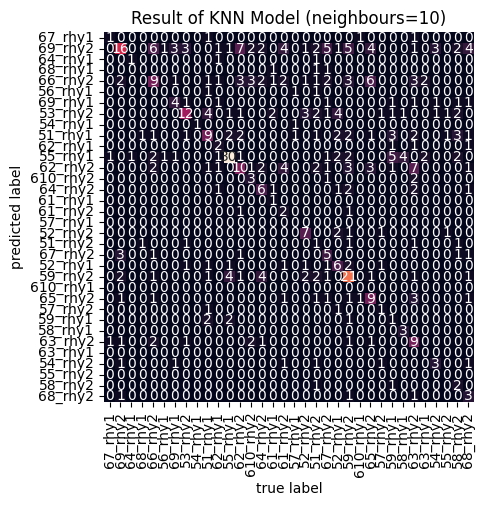

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle

# read the song_features file
fn = "deney2/song_features_train.csv"
df = pd.read_csv(fn)

fn_test = "deney2/song_features_test.csv"
df_test = pd.read_csv(fn)

# convert types of dance into unique integer numbers in order to classify
targets = df["Type of Dance"].unique()
map_to_integer = {dance:n for n, dance in enumerate(targets)}
map_to_labels = {n:dance for n, dance in enumerate(targets)}
df["targets"] = df["Type of Dance"].replace(map_to_integer)
df_test["targets"] = df_test["Type of Dance"].replace(map_to_integer)

# subset the features data
features = list(df.columns[2:9])

# split data into train and test data
X_train=df[features] 
y_train=df['targets']
X_test=df_test[features]
y_test=df_test['targets']

# scale the data (normalise the data into the range 0-1)
scaler = StandardScaler() # initialise the scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# build the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# evaluate the model
y_pred = knn.predict(X_test)
# convert y_pred and y_test back into labels
y_test_labels = y_test.replace(map_to_labels)
y_pred_labels = pd.Series(y_pred).replace(map_to_labels)

score = metrics.classification_report(y_test, y_pred)
print(score)

plt.figure()
mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=targets, yticklabels=targets)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Result of KNN Model (neighbours=10)')
plt.show()


## KNN MODEL ADVANCED

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.38      0.67      0.48         9
           4       0.20      0.14      0.17         7
           6       0.00      0.00      0.00         1
           7       0.17      0.43      0.24         7
           9       0.29      0.50      0.36         4
          10       0.00      0.00      0.00         1
          11       0.71      0.62      0.67         8
          12       0.40      0.33      0.36         6
          13       0.38      0.60      0.46         5
          14       0.80      0.80      0.80         5
          15       0.50      1.00      0.67         1
          16       0.00      0.00      0.00         3
          18       0.50      0.80      0.62         5
          19       0.00      0.00      0.00         1
          20       1.00      0.67      0.80         3
          21       0.50      0.17      0.25         6
          22       0.50    

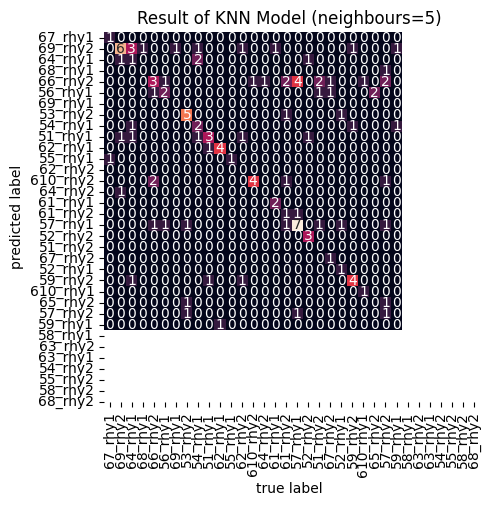

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle

# read the song_features file
fn_train = "deney2/song_features_advanced_train.csv"
df_train = pd.read_csv(fn_train)
# read the song_features file
fn_test = "deney2/song_features_advanced_test.csv"
df_test = pd.read_csv(fn_test)

# convert types of dance into unique integer numbers in order to classify
targets = df_train["Type of Dance"].unique()
map_to_integer = {dance:n for n, dance in enumerate(targets)}
map_to_labels = {n:dance for n, dance in enumerate(targets)}
targets_column_train = df_train["Type of Dance"].replace(map_to_integer)
targets_column_test = df_test["Type of Dance"].replace(map_to_integer)

# subset the features data
features = list(df_train.columns[2:])

# split data into train and test data
X_train = df_train[features]
y_train = targets_column_train
X_test = df_test[features]
y_test = targets_column_test

# scale the data (normalise the data into the range 0-1)
scaler = StandardScaler() # initialise the scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# build the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# evaluate the model
y_pred = knn.predict(X_test)
# convert y_pred and y_test back into labels
y_test_labels = y_test.replace(map_to_labels)
y_pred_labels = pd.Series(y_pred).replace(map_to_labels)

score = metrics.classification_report(y_test, y_pred)
print(score)

plt.figure()
mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=targets, yticklabels=targets)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Result of KNN Model (neighbours=5)')
plt.show()

# Save the model
file_pickle = "deney2/knn.pickle"
with open(file_pickle, 'wb') as f:
    pickle.dump(knn, f)

## RANDOM FOREST MODEL

              precision    recall  f1-score   support

     51_rhy1       1.00      1.00      1.00        22
     51_rhy2       1.00      1.00      1.00        17
     52_rhy1       1.00      1.00      1.00        19
     52_rhy2       1.00      1.00      1.00        15
     53_rhy2       1.00      1.00      1.00        20
     54_rhy1       1.00      1.00      1.00         1
     54_rhy2       1.00      1.00      1.00         8
     55_rhy1       1.00      1.00      1.00        41
     55_rhy2       1.00      1.00      1.00         3
     56_rhy1       1.00      1.00      1.00         2
     57_rhy1       1.00      1.00      1.00         3
     57_rhy2       1.00      1.00      1.00         5
     58_rhy1       1.00      1.00      1.00         8
     58_rhy2       1.00      1.00      1.00        14
     59_rhy1       1.00      1.00      1.00        14
     59_rhy2       1.00      1.00      1.00        47
    610_rhy1       1.00      1.00      1.00         2
    610_rhy2       1.00    

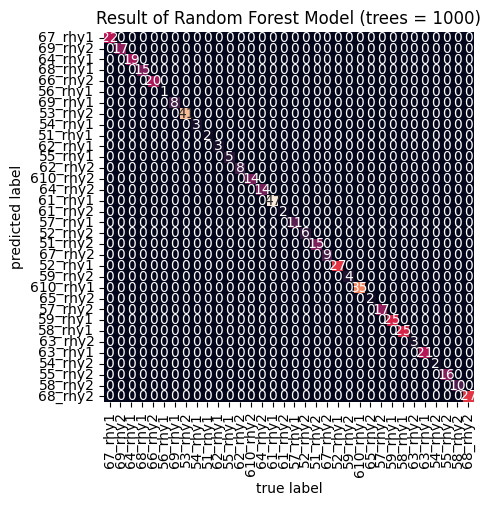

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


# read the song_features file
fn = "deney2/song_features_train.csv"
df = pd.read_csv(fn)

fn_test = "deney2/song_features_test.csv"
df_test = pd.read_csv(fn)

# convert types of dance into unique integer numbers in order to classify
targets = df["Type of Dance"].unique()
map_to_integer = {dance:n for n, dance in enumerate(targets)}
map_to_labels = {n:dance for n, dance in enumerate(targets)}
df["targets"] = df["Type of Dance"].replace(map_to_integer)
df_test["targets"] = df_test["Type of Dance"].replace(map_to_integer)

# subset the features data
features = list(df.columns[2:9])

# split data into train and test data
X_train=df[features] 
y_train=df['targets']
X_test=df_test[features]
y_test=df_test['targets']

# build the model
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

# evaluate the model
y_pred = model.predict(X_test)
# convert y_pred and y_test back into labels
y_test_labels = y_test.replace(map_to_labels)
y_pred_labels = pd.Series(y_pred).replace(map_to_labels)

score = metrics.classification_report(y_test_labels, y_pred_labels)
print(score)


plt.figure()
mat = metrics.confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=targets, yticklabels=targets)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Result of Random Forest Model (trees = 1000)')
plt.show()

## RANDOM FOREST MODEL ADVANCED

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     51_rhy1       0.20      0.25      0.22         4
     51_rhy2       0.00      0.00      0.00         1
     52_rhy1       0.50      0.50      0.50         6
     52_rhy2       0.62      1.00      0.77         5
     53_rhy2       0.75      0.43      0.55         7
     54_rhy2       1.00      0.50      0.67         2
     55_rhy1       0.64      0.88      0.74         8
     55_rhy2       0.50      0.50      0.50         2
     57_rhy2       0.50      0.25      0.33         4
     58_rhy1       1.00      0.33      0.50         3
     58_rhy2       0.67      0.29      0.40         7
     59_rhy1       0.00      0.00      0.00         3
     59_rhy2       0.57      0.92      0.71        13
    610_rhy2       1.00      0.60      0.75         5
     61_rhy1       0.33      1.00      0.50         1
     61_rhy2       0.50      0.33      0.40         3
     62_rhy1       0.00      0.00      0.00         1
     62_rhy2       0.50    

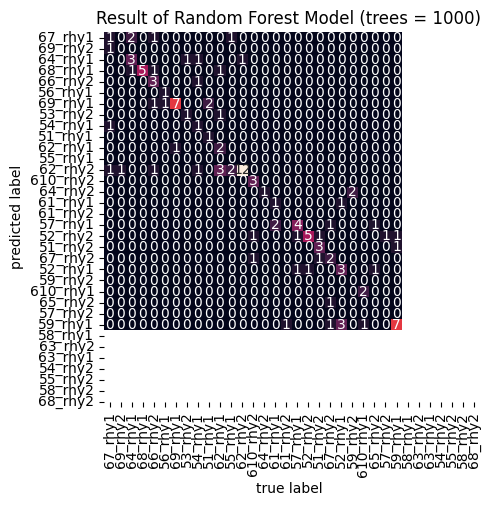

Accuracy:  0.5619834710743802


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# read the song_features file
fn_train = "deney2/song_features_advanced_train.csv"
df_train = pd.read_csv(fn_train)
# read the song_features file
fn_test = "deney2/song_features_advanced_test.csv"
df_test = pd.read_csv(fn_test)

#df_train = df_train[df_train["Type of Dance"].isin(["Chacha", "Foxtrot", "Jive","Quickstep","Rumba","Samba",
 #                                                   "Tango"])]
#df_test = df_test[df_test["Type of Dance"].isin(["Chacha", "Foxtrot", "Jive","Quickstep","Rumba","Samba","Tango"])]


# convert types of dance into unique integer numbers in order to classify
targets = df_train["Type of Dance"].unique()
map_to_integer = {dance:n for n, dance in enumerate(targets)}
map_to_labels = {n:dance for n, dance in enumerate(targets)}
targets_column_train = df_train["Type of Dance"].replace(map_to_integer)
targets_column_test = df_test["Type of Dance"].replace(map_to_integer)

# subset the features data
features = list(df_train.columns[2:])

# split data into train and test data
X_train = df_train[features]
y_train = targets_column_train
X_test = df_test[features]
y_test = targets_column_test

# scale the data (normalise the data into the range 0-1)
scaler = StandardScaler() # initialise the scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# build the model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# evaluate the model
y_pred = model.predict(X_test)
# convert y_pred and y_test back into labels
y_test_labels = y_test.replace(map_to_labels)
y_pred_labels = pd.Series(y_pred).replace(map_to_labels)

score = metrics.classification_report(y_test_labels, y_pred_labels)
print(score)


plt.figure()
mat = metrics.confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=targets, yticklabels=targets)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Result of Random Forest Model (trees = 1000)')
plt.show()

file_pickle = "deney2/random_forest.pickle"
with open(file_pickle, 'wb') as f:
    pickle.dump(model, f)

print("Accuracy: ", sum(y_test.values==y_pred)/len(y_test))

## SVM MODEL

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.40      0.22      0.29        27
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.33      0.36      0.35        25
           5       0.00      0.00      0.00         2
           6       0.25      0.40      0.31        10
           7       0.43      0.50      0.47        20
           8       1.00      1.00      1.00         1
           9       0.30      0.14      0.19        22
          10       1.00      0.11      0.20         9
          11       0.49      0.80      0.61        41
          12       0.25      0.41      0.31        27
          13       0.00      0.00      0.00        11
          14       0.57      0.24      0.33        17
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00        15
          17       1.00    

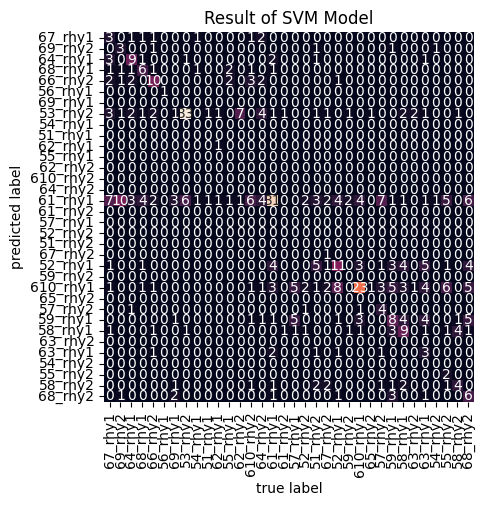

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# read the song_features file
fn = "deney2/song_features_train.csv"
df = pd.read_csv(fn)

fn_test = "deney2/song_features_test.csv"
df_test = pd.read_csv(fn)

# convert types of dance into unique integer numbers in order to classify
targets = df["Type of Dance"].unique()
map_to_integer = {dance:n for n, dance in enumerate(targets)}
map_to_labels = {n:dance for n, dance in enumerate(targets)}
df["targets"] = df["Type of Dance"].replace(map_to_integer)
df_test["targets"] = df_test["Type of Dance"].replace(map_to_integer)

# subset the features data
features = list(df.columns[2:9])

# split data into train and test data
X_train=df[features] 
y_train=df['targets']
X_test=df_test[features]
y_test=df_test['targets']

# scale the data (normalise the data into the range 0-1)
scaler = StandardScaler() # initialise the scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# build the model
svm = SVC()
svm.fit(X_train, y_train)

# evaluate the model
y_pred = svm.predict(X_test)
# convert y_pred and y_test back into labels
y_test_labels = y_test.replace(map_to_labels)
y_pred_labels = pd.Series(y_pred).replace(map_to_labels)

score = metrics.classification_report(y_test, y_pred)
print(score)


plt.figure()
mat = metrics.confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=targets, yticklabels=targets)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Result of SVM Model')
plt.show()

# Save the model
file_pickle = "deney2/svm.pickle"
with open(file_pickle, 'wb') as f:
    pickle.dump(svm, f)

## SVM MODEL ADVANCED

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     51_rhy1       0.00      0.00      0.00         4
     51_rhy2       0.00      0.00      0.00         1
     52_rhy1       0.33      0.17      0.22         6
     52_rhy2       0.38      0.60      0.46         5
     53_rhy2       0.17      0.29      0.21         7
     54_rhy2       0.00      0.00      0.00         2
     55_rhy1       0.33      0.50      0.40         8
     55_rhy2       0.00      0.00      0.00         2
     57_rhy2       0.00      0.00      0.00         4
     58_rhy1       0.00      0.00      0.00         3
     58_rhy2       0.00      0.00      0.00         7
     59_rhy1       0.00      0.00      0.00         3
     59_rhy2       0.40      0.77      0.53        13
    610_rhy2       0.00      0.00      0.00         5
     61_rhy1       0.50      1.00      0.67         1
     61_rhy2       0.00      0.00      0.00         3
     62_rhy1       0.00      0.00      0.00         1
     62_rhy2       1.00    

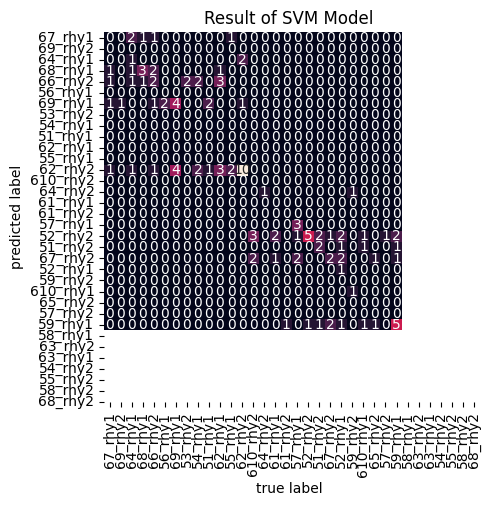

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle

# read the song_features file
fn_train = "deney2/song_features_advanced_train.csv"
df_train = pd.read_csv(fn_train)
# read the song_features file
fn_test = "deney2/song_features_advanced_test.csv"
df_test = pd.read_csv(fn_test)


# convert types of dance into unique integer numbers in order to classify
targets = df_train["Type of Dance"].unique()
map_to_integer = {dance:n for n, dance in enumerate(targets)}
map_to_labels = {n:dance for n, dance in enumerate(targets)}
targets_column_train = df_train["Type of Dance"].replace(map_to_integer)
targets_column_test = df_test["Type of Dance"].replace(map_to_integer)


# subset the features data
features = list(df_train.columns[2:])

# split data into train and test data
#X_train, X_test, y_train, y_test = train_test_split(df[features], targets_column, test_size=.2, random_state=100)
X_train = df_train[features]
y_train = targets_column_train
X_test = df_test[features]
y_test = targets_column_test

# scale the data (normalise the data into the range 0-1)
scaler = StandardScaler() # initialise the scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# build the model
svm = SVC()
svm.fit(X_train, y_train)

# evaluate the model
y_pred = svm.predict(X_test)
# convert y_pred and y_test back into labels
y_test_labels = y_test.replace(map_to_labels)
y_pred_labels = pd.Series(y_pred).replace(map_to_labels)

score = metrics.classification_report(y_test_labels, y_pred_labels)
print(score)


plt.figure()
mat = metrics.confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=targets, yticklabels=targets)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Result of SVM Model')
plt.show()

# Save the model
file_pickle = "deney2/svm.pickle"
with open(file_pickle, 'wb') as f:
    pickle.dump(svm, f)

## TEST NEW SONG

In [ ]:
import pandas as pd
from pydub import AudioSegment
import os
import madmom
import time
import os
from tqdm import tqdm
import numpy as np
import librosa
from scipy.fftpack import fft
from pyAudioAnalysis import audioFeatureExtraction
import pickle
from keras.models import load_model
tqdm.monitor_interval = 0

# Constant
FIXED_WINDOWS_TO_CUT = 10 *1000 # cut 10 second windows
OVERLAP = 0 *1000 # define the 5 seconds overlap
RANGE = [30,40,80,120,180,300] # frequency range for fingerprint
# Name of Song,Type of Dance,Count, BPM, maxfreq_30_40, maxfreq_40_80, maxfreq_80_120, maxfreq_120_180, maxfreq_180_300
# Short-term features name
st_feature_names = ['zcr', 'energy', 'energy_entropy','spectral_centroid','spectral_spread','spectral_entropy',
'spectral_flux','spectral_rolloff','mfcc_1','mfcc_2','mfcc_3','mfcc_4','mfcc_5','mfcc_6','mfcc_7','mfcc_8','mfcc_9',
'mfcc_10','mfcc_11','mfcc_12','mfcc_13','chroma_1','chroma_2','chroma_3','chroma_4','chroma_5','chroma_6','chroma_7',
'chroma_8','chroma_9','chroma_10','chroma_11','chroma_12','chroma_std']
# scaler file
scaler_file = "deney2/x_scaler.pickle"
# modle file
svm_file = "deney2/svm.pickle"
knn_file = "deney2/knn.pickle"
neural_network_file = "deney2/neural_network.h5"
random_forest_file="deney2/random_forest.pickle"

# Take a file name
file_in = "/content/Media-105906.wav"
tmp_folder = "new"

def classify(tmp_folder, file_in):
    if os.path.isdir(tmp_folder):
        import shutil
        shutil.rmtree(tmp_folder)
        os.mkdir(tmp_folder)
        print("Created tmp folder!")
    else:
        os.mkdir(tmp_folder)
        print("Created tmp folder!")
    #######################################################################################################################

    filename = file_in.split("/")[-1]

    # Cut the file into 10 sencond-window
    sound = AudioSegment.from_mp3(file_in) # read the whole song
    # determine how many chunks you will cut the song into
    iterations = int(sound.duration_seconds*1000/(FIXED_WINDOWS_TO_CUT-OVERLAP))
    for i in range(iterations):
        start = i * (FIXED_WINDOWS_TO_CUT-OVERLAP) # determine the start and end
        end = start + FIXED_WINDOWS_TO_CUT
        song_10_seconds = sound[start:end]
        song_10_seconds.export(tmp_folder + "/" + filename + "_" + str(i) +".wav", format="wav")

    #######################################################################################################################

    # Open a csv and write the title
    f = open(tmp_folder+'/song_features_advanced.csv', mode = 'w')
    try:
        string_to_write = "Name of Song,Count, BPM, maxfreq_30_40, maxfreq_40_80, maxfreq_80_120, maxfreq_120_180, maxfreq_180_300"
        for name in st_feature_names:
            column_name_mean = "mean_" + name
            column_name_std = "std_" + name
            string_to_write = string_to_write + ", " + column_name_mean + ", " + column_name_std

        f.write(string_to_write + "\n")


        folder_path = tmp_folder
        file_list = os.listdir(folder_path)
        for file in tqdm(file_list):
            file_path = folder_path + "/" + file
            try:
                ###### Count extraction #####
                proc = madmom.features.DBNDownBeatTrackingProcessor(beats_per_bar=[2, 3, 4], fps=100)
                act = madmom.features.RNNDownBeatProcessor()(file_path)
                count = proc(act)
                max_count = int(count[:,1].max())
                #print("Successfully extracted count feature")

                ##### BPM extraction ######
                data, sr = librosa.load(file_path)
                tempo, beats = librosa.beat.beat_track(y=data, sr=sr)
                #print("Successfully extracted bpm feature")

                ##### Fingerprint extraction ######
                if data.ndim == 2:
                    data_sum = data[:, 0] + data[:, 1]
                else:
                    data_sum = data
                fft_out = fft(data_sum)
                fft_out = np.abs(fft_out)
                max_ranges = []
                for i in range(len(RANGE) - 1):
                    start = i
                    end = start + 1
                    start_freq = RANGE[start]
                    end_freq = RANGE[end]
                    max_range = start_freq + np.argmax(fft_out[start_freq:end_freq])
                    max_ranges.append(max_range)

                ##### Short-term features and statistic of it (Mid-term) ######
                # Extract short-term features
                F, f_names = audioFeatureExtraction.stFeatureExtraction(data, sr, 0.050 * sr, 0.025 * sr)
                # Extract the stats of short-term features
                mean_st_features = F.mean(axis=1).reshape(-1)
                std_st_features = F.std(axis=1).reshape(-1)

                ##### Write to file #######

                string_to_write = '"'+ file + '"' + "," + str(max_count) + "," + str(tempo) + \
                                  "," + str(max_ranges[0]) + "," + str(max_ranges[1]) + "," + \
                                  str(max_ranges[2]) + "," + str(max_ranges[3]) + "," + str(max_ranges[4])

                for index, name in enumerate(f_names):
                    string_to_write = string_to_write + \
                                      "," + str(mean_st_features[index]) + \
                                      "," + str(mean_st_features[index])

                f.write(string_to_write + "\n")

            except Exception as e:
                print("error in file:",file, "\n" + str(e))
    except:
        f.close()

    finally:
        f.close()

    #######################################################################################################################

    # read the song_features file
    fn = tmp_folder + "/song_features_advanced.csv"
    df = pd.read_csv(fn)
    # subset the features data
    features = list(df.columns[1:])
    X_test = df[features]

    # load the scaler
    with open(scaler_file, 'rb') as f:
        scaler = pickle.load(f)

    X_test = scaler.transform(X_test)

    # load the svm model
    with open(svm_file, 'rb') as f:
        svm = pickle.load(f)

    # load the knn model
    with open(knn_file, 'rb') as f:
        knn = pickle.load(f)

    with open(random_forest_file, 'rb') as f:
        random_forest = pickle.load(f)

    # load the nn model
    nn_model = model = load_model(neural_network_file)

    # Make the prediction
    y_pred_svm = svm.predict(X_test)

    # make knn results
    y_pred_knn = knn.predict(X_test)

    y_pred_random = random_forest.predict(X_test)

    # make nn results
    y_pred_nn = model.predict(X_test)
    uniques = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    # Convert y_pred from One-hot to integer
    y_pred_nn = uniques[y_pred_nn.argmax(axis = 1)]


    # convert y_pred and y_test back into labels
    map_to_labels = {0: 'chachacha', 1: 'quickstep', 2: 'waltz', 3:'tango'}
    y_pred_labels_svm = pd.Series(y_pred_svm).replace(map_to_labels)
    y_pred_labels_knn = pd.Series(y_pred_knn).replace(map_to_labels)
    y_pred_labels_nn = pd.Series(y_pred_nn).replace(map_to_labels)
    y_pred_labels_random = pd.Series(y_pred_random).replace(map_to_labels)

    print("###################### SVM ######################")
    print(y_pred_labels_svm)
    print(y_pred_labels_svm.value_counts())
    print("###################### KNN ######################")
    print(y_pred_labels_knn)
    print(y_pred_labels_knn.value_counts())
    print("###################### NN ######################")
    print(y_pred_labels_nn)
    print(y_pred_labels_nn.value_counts())
    print("###################### RandomForest ######################")
    print(y_pred_labels_random)
    print(y_pred_labels_random.value_counts())

classify(file_in=file_in, tmp_folder=tmp_folder)

Created tmp folder!


  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/madmom/features/downbeats.py:287: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  best = np.argmax(np.asarray(results)[:, 1])
100%|██████████| 4/4 [00:17<00:00,  4.32s/it]


error in file: song_features_advanced.csv 
"All attempts to load audio file 'new/song_features_advanced.csv' failed."
1/1 [==============================] - 0s 77ms/step
###################### SVM ######################
0    quickstep
1    quickstep
2        tango
dtype: object
quickstep    2
tango        1
dtype: int64
###################### KNN ######################
0    quickstep
1    chachacha
2        tango
dtype: object
quickstep    1
chachacha    1
tango        1
dtype: int64
###################### NN ######################
0    waltz
1    tango
2    tango
dtype: object
tango    2
waltz    1
dtype: int64
###################### RandomForest ######################
0    waltz
1    tango
2    tango
dtype: object
tango    2
waltz    1
dtype: int64


# DENEY 3

source:https://github.com/mrugacz95/dance_style_recognition


pdf:https://github.com/mrugacz95/dance_style_recognition/blob/master/report.pdf

Firstly we have to import all needed libraries.

In [ ]:
import os

import glob2
import librosa
import numpy as np
from librosa.display import specshow
from librosa.feature import mfcc
from librosa.feature import melspectrogram
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from joblib import Parallel, delayed
import numpy as np
from tqdm import tqdm_notebook as tqdm
from collections import defaultdict
from shutil import copyfile
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.callbacks import TensorBoard
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools

`extract_features()` will be used to load file and draw and return coresponding spectrogram.

In [ ]:
def extract_features(file, mfcc_n=16):
    soundfile, samplerate = librosa.core.load(file)
    spectogram = melspectrogram(y=soundfile, n_fft=2048, n_mels=128, hop_length=1040)
    spectogram = librosa.power_to_db(spectogram, ref=np.max)
    return spectogram

all_files = glob2.glob('/content/wav/**/*.wav')
print(all_files)
extract_features(all_files[1]).shape

['/content/wav/67_rhy1/67_rhy1_ref2559742.wav', '/content/wav/67_rhy1/67_rhy1_ref3559742.wav', '/content/wav/67_rhy1/67_rhy1_ref3597742.wav', '/content/wav/67_rhy1/67_rhy1_ref2838732.wav', '/content/wav/67_rhy1/67_rhy1_ref3590752.wav', '/content/wav/67_rhy1/67_rhy1_ref2548742.wav', '/content/wav/67_rhy1/67_rhy1_ref2198742.wav', '/content/wav/67_rhy1/67_rhy1_ref1952752.wav', '/content/wav/67_rhy1/67_rhy1_ref1177752.wav', '/content/wav/67_rhy1/67_rhy1_ref4700752.wav', '/content/wav/67_rhy1/67_rhy1_ref2597742.wav', '/content/wav/67_rhy1/67_rhy1_ref1882742.wav', '/content/wav/67_rhy1/67_rhy1_ref1937742.wav', '/content/wav/67_rhy1/67_rhy1_ref2590752.wav', '/content/wav/67_rhy1/67_rhy1_per1837742_pass.wav', '/content/wav/67_rhy1/67_rhy1_ref1590752.wav', '/content/wav/67_rhy1/67_rhy1_ref2917752.wav', '/content/wav/67_rhy1/67_rhy1_ref3952752.wav', '/content/wav/67_rhy1/67_rhy1_ref3838732.wav', '/content/wav/67_rhy1/67_rhy1_ref2700752.wav', '/content/wav/67_rhy1/67_rhy1_ref3964742.wav', '/conte

(128, 95)

In [ ]:
directory = "records"
parent_dir = "/content"
path = os.path.join(parent_dir, directory)
os.mkdir(path)

In [ ]:
def preprocess(file):
    new_name = file.replace('.wav', '.npy').replace('/content/wav/','records/')
    directory = os.path.basename(os.path.dirname(new_name))
    try:
      if not os.path.isdir(os.path.join('records', directory)):
          os.mkdir(os.path.join('records', directory))
    except OSError as err:
      print(err)
    features = extract_features(file)
    np.save(new_name, features, allow_pickle=False)

We use joblib to parallelize preprocessing

In [ ]:
v = Parallel(n_jobs=5)(delayed(preprocess)(x) for x in tqdm(all_files))

<ipython-input-11-bf8e14d73930>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  v = Parallel(n_jobs=5)(delayed(preprocess)(x) for x in tqdm(all_files))


  0%|          | 0/2652 [00:00<?, ?it/s]

We have to check if data was properly saved and make some data exploration

65


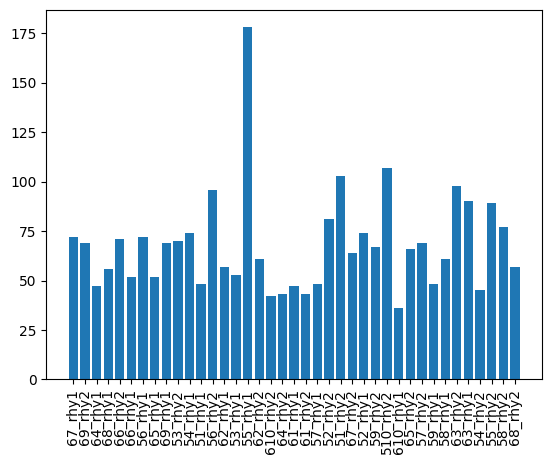

2652


In [ ]:
classes = defaultdict(int)
min_shape = np.inf
for file in all_files:
    npy_file = file.replace('.wav','.npy').replace('/content/wav/', '/content/records/')
    data = np.load(npy_file) # check if correct saved
    min_shape = min(min_shape, data.shape[1])
    last_shape = data.shape
    classes[os.path.basename(os.path.dirname(file))] += 1
plt.bar(classes.keys(), classes.values())
plt.xticks(rotation=90)
print(min_shape)
plt.show()
print(len(all_files))

Now we are redy to split files to train and test examples

In [ ]:
import shutil
path = '/content/datasets'
try:
   shutil.rmtree(path)
   print("directory is removed successfully")
except OSError as x:
   print("Error occured: %s : %s" % (path, x.strerror))

directory is removed successfully


In [ ]:
def split_array(genders):
  split_value=int(len(genders)*0.8)
  return genders[:split_value], genders[split_value:]

file_train=[]
file_test=[]
pre_files=[]
for class_name in sub_folders:
  temp= glob2.glob('/content/records/'+class_name+'/*.npy')
  temp.sort()
  train, test=split_array(temp)
  file_train=file_train+train
  file_test=file_test+test
  pre_files+=temp

for file in file_test:
    new_name = file.replace('/content/records', 'deney3/test')
    directory = os.path.basename(os.path.dirname(new_name))
    if not os.path.isdir(os.path.join('deney3/test', directory)):
        os.mkdir(os.path.join('deney3/test', directory))
    copyfile(file, new_name)

for file in file_train:
    new_name = file.replace('/content/records', 'deney3/train')
    directory = os.path.basename(os.path.dirname(new_name))
    if not os.path.isdir(os.path.join('deney3/train', directory)):
        os.mkdir(os.path.join('deney3/train', directory))
    copyfile(file, new_name)

In [ ]:
len(glob2.glob('deney3/train/**/*.npy')), len(glob2.glob('deney3/test/**/*.npy'))

(2103, 549)

This function creates CNN model with 3 convolution layers and 2 dense layers.

In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv1D(256, kernel_size=4, strides=2, activation='relu',
                     data_format='channels_last',
                     input_shape=(65, 128)))
    model.add(MaxPooling1D(pool_size=4))
    model.add(Conv1D(256, kernel_size=4, strides=2, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=4))
    model.add(Conv1D(512, kernel_size=4, strides=2, activation='relu', padding='same'))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(39, activation='softmax'))
    
              
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
model = create_model()

In [ ]:
le = preprocessing.LabelBinarizer()
le.fit(list(classes.keys()))
le.classes_
le.transform(['510_rhy2','51_rhy1','51_rhy2','52_rhy1','52_rhy2','53_rhy1','53_rhy2',
                                               '54_rhy1','54_rhy2','55_rhy1','55_rhy2','56_rhy1','56_rhy2','57_rhy1',
                                               '57_rhy2','58_rhy1','58_rhy2','59_rhy1','59_rhy2','610_rhy1','610_rhy2',
                                               '61_rhy1','61_rhy2','62_rhy1','62_rhy2','63_rhy1','63_rhy2','64_rhy1',
                                               '64_rhy2','65_rhy1','65_rhy2','66_rhy1','66_rhy2','67_rhy1','67_rhy2',
                                               '68_rhy1','68_rhy2','69_rhy1','69_rhy2'])

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
def extract_class(file_name):
    return os.path.basename(os.path.dirname(file_name))

#extract_class('/content/test/Samba/Albums-Latin_Jam-03.npy'), extract_class('/content/test/Jive/Media-103515.npy')

Here we load all test data to one numpy array

In [ ]:
train_data = glob2.glob('deney3/train/**/*.npy')
X_train = np.empty((len(train_data), 65, 128))
y_train = np.empty((len(train_data), 39))
for idx, file in tqdm(enumerate(train_data)):
    data = np.transpose(np.load(pre_files[0])[:,:65])
    data = (data - np.mean(data)) / np.std(data)
    X_train[idx, :, :] = data
    y = np.zeros(39)
    example_class = extract_class(file)
    y_train[idx,:] = le.transform([example_class])

<ipython-input-22-023102c686b2>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for idx, file in tqdm(enumerate(train_data)):


0it [00:00, ?it/s]

In [ ]:
print(np.max(X_train), np.min(X_train))
print(np.max(X_train[1]), np.min(X_train[1]))

2.0759291648864746 -3.561739444732666
2.0759291648864746 -3.561739444732666


And start learning

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=[TensorBoard(log_dir='./logs', 
                                                                             histogram_freq=0,
                                                                             batch_size=32, 
                                                                             write_graph=True,
                                                                             write_grads=False, 
                                                                             write_images=False,
                                                                             embeddings_freq=0, 
                                                                             embeddings_layer_names=None,
                                                                             embeddings_metadata=None, 
                                                                             embeddings_data=None, 
                                                                             update_freq='epoch')])

Epoch 1/10
66/66 [==============================] - 13s 176ms/step - loss: 3.6476 - accuracy: 0.0637
Epoch 2/10
66/66 [==============================] - 12s 175ms/step - loss: 3.6262 - accuracy: 0.0675
Epoch 3/10
66/66 [==============================] - 11s 173ms/step - loss: 3.6235 - accuracy: 0.0675
Epoch 4/10
66/66 [==============================] - 11s 174ms/step - loss: 3.6166 - accuracy: 0.0675
Epoch 5/10
66/66 [==============================] - 10s 158ms/step - loss: 3.6144 - accuracy: 0.0675
Epoch 6/10
66/66 [==============================] - 11s 170ms/step - loss: 3.6132 - accuracy: 0.0675
Epoch 7/10
66/66 [==============================] - 12s 176ms/step - loss: 3.6139 - accuracy: 0.0675
Epoch 8/10
66/66 [==============================] - 13s 200ms/step - loss: 3.6159 - accuracy: 0.0675
Epoch 9/10
66/66 [==============================] - 16s 244ms/step - loss: 3.6118 - accuracy: 0.0675
Epoch 10/10
66/66 [==============================] - 11s 169ms/step - loss: 3.6116 - accura

In [ ]:
model.save('deney3/dance_style_recognition.h5')

We similary load teat data 

In [ ]:
test_data = glob2.glob('deney3/test/**/*.npy')
X_test = np.empty((len(test_data), 65, 128))
y_true = np.empty((len(test_data), 39))
for idx, file in tqdm(enumerate(test_data)):
    data = np.transpose(np.load(file)[:,:65])
    data = (data - np.mean(data)) / np.std(data)
    X_test[idx, :, :] = data
    y = np.zeros(39)
    example_class = extract_class(file)
    y_true[idx,:] = le.transform([example_class])

<ipython-input-26-7ba90a826f1f>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for idx, file in tqdm(enumerate(test_data)):


0it [00:00, ?it/s]

In [ ]:
y_pred = model.predict(X_test)

18/18 [==============================] - 1s 25ms/step


In [ ]:
label_true = le.inverse_transform(y_true)
label_pred = le.inverse_transform(y_pred)
print(label_true[:10]) 
print(label_pred[:10])

['67_rhy1' '67_rhy1' '67_rhy1' '67_rhy1' '67_rhy1' '67_rhy1' '67_rhy1'
 '67_rhy1' '67_rhy1' '67_rhy1']
['55_rhy1' '55_rhy1' '55_rhy1' '55_rhy1' '55_rhy1' '55_rhy1' '55_rhy1'
 '55_rhy1' '55_rhy1' '55_rhy1']


print(label_true[:10])
print(label_pred[:10])

Finally we calculate accuracy and plot confusion matrix

Acc:  0.06557377049180328
Confusion matrix, without normalization
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


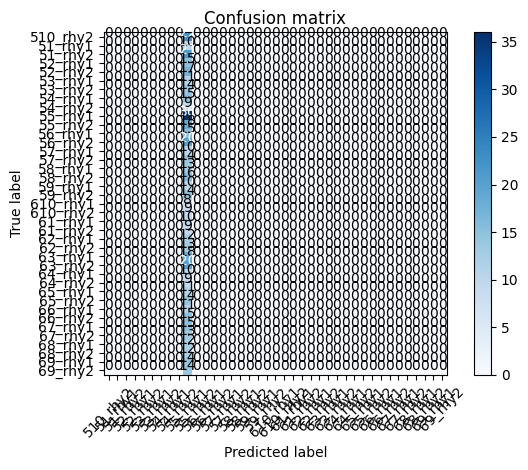

In [ ]:
acc = accuracy_score(label_true, label_pred)
print('Acc: ', acc)
confmat = confusion_matrix(label_true, label_pred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
plot_confusion_matrix(confmat, le.classes_)

We can also check styles distribution in train and test sets

549


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, '67_rhy1'),
  Text(1, 0, '69_rhy2'),
  Text(2, 0, '64_rhy1'),
  Text(3, 0, '68_rhy1'),
  Text(4, 0, '66_rhy2'),
  Text(5, 0, '66_rhy1'),
  Text(6, 0, '56_rhy1'),
  Text(7, 0, '65_rhy1'),
  Text(8, 0, '69_rhy1'),
  Text(9, 0, '53_rhy2'),
  Text(10, 0, '54_rhy1'),
  Text(11, 0, '51_rhy1'),
  Text(12, 0, '56_rhy2'),
  Text(13, 0, '62_rhy1'),
  Text(14, 0, '53_rhy1'),
  Text(15, 0, '55_rhy1'),
  Text(16, 0, '62_rhy2'),
  Text(17, 0, '610_rhy2'),
  Text(18, 0, '64_rhy2'),
  Text(19, 0, '61_rhy1'),
  Text(20, 0, '61_rhy2'),
  Text(21, 0, '57_rhy1'),
  Text(22, 0, '52_rhy2'),
  Text(23, 0, '51_rhy2'),
  Text(24, 0, '67_rhy2'),
  Text(25, 0, '52_rhy1'),
  Text(26, 0, '59_rhy2'),
  Text(27, 0, '510_rhy2'),
  Text(28, 0, '610_rhy1'),
  Text(29, 0, '65_rhy2'),
  

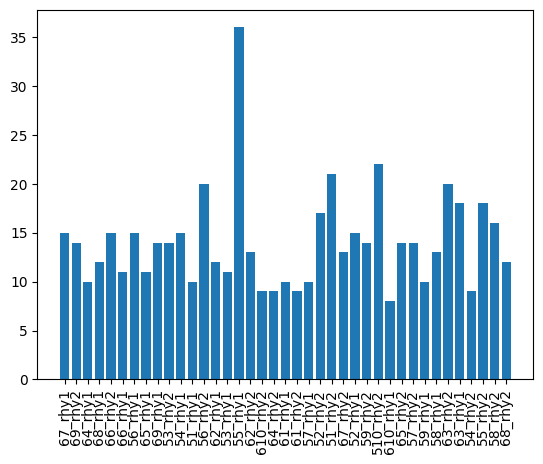

In [ ]:
test_data = glob2.glob('deney3/test/**/*.npy')
print(len(test_data))
test_c = defaultdict(int)
for file in test_data:
    test_c[extract_class(file)] += 1
plt.bar(test_c.keys(), test_c.values())
plt.xticks(rotation=90)

2103


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, '67_rhy1'),
  Text(1, 0, '69_rhy2'),
  Text(2, 0, '64_rhy1'),
  Text(3, 0, '68_rhy1'),
  Text(4, 0, '66_rhy2'),
  Text(5, 0, '66_rhy1'),
  Text(6, 0, '56_rhy1'),
  Text(7, 0, '65_rhy1'),
  Text(8, 0, '69_rhy1'),
  Text(9, 0, '53_rhy2'),
  Text(10, 0, '54_rhy1'),
  Text(11, 0, '51_rhy1'),
  Text(12, 0, '56_rhy2'),
  Text(13, 0, '62_rhy1'),
  Text(14, 0, '53_rhy1'),
  Text(15, 0, '55_rhy1'),
  Text(16, 0, '62_rhy2'),
  Text(17, 0, '610_rhy2'),
  Text(18, 0, '64_rhy2'),
  Text(19, 0, '61_rhy1'),
  Text(20, 0, '61_rhy2'),
  Text(21, 0, '57_rhy1'),
  Text(22, 0, '52_rhy2'),
  Text(23, 0, '51_rhy2'),
  Text(24, 0, '67_rhy2'),
  Text(25, 0, '52_rhy1'),
  Text(26, 0, '59_rhy2'),
  Text(27, 0, '510_rhy2'),
  Text(28, 0, '610_rhy1'),
  Text(29, 0, '65_rhy2'),
  

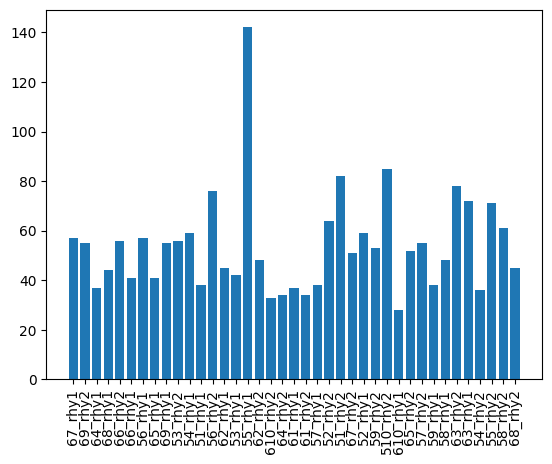

In [ ]:
print(len(train_data))
train_c = defaultdict(int)
for file in train_data:
    train_c[extract_class(file)] += 1
plt.bar(train_c.keys(), train_c.values())
plt.xticks(rotation=90)

# DENEY 4

source:https://github.com/CaifengLiu/music-genre-classification

pdf:https://link.springer.com/article/10.1007/s11042-020-09643-6

## Train test split

In [ ]:
def split_array(genders):
  split_value=int(len(genders)*0.8)
  return genders[:split_value], genders[split_value:]

file_train=[]
file_test=[]
pre_files=[]
for class_name in sub_folders:
  temp= glob2.glob('/content/wav/'+class_name+'/*.wav')
  temp.sort()
  train, test=split_array(temp)
  file_train=file_train+train
  file_test=file_test+test
  pre_files+=temp

for file in file_test:
    new_name = file.replace('/content/wav', 'test')
    directory = os.path.basename(os.path.dirname(new_name))
    if not os.path.isdir(os.path.join('test', directory)):
        os.mkdir(os.path.join('test', directory))
    copyfile(file, new_name)

for file in file_train:
    new_name = file.replace('/content/wav', 'train')
    directory = os.path.basename(os.path.dirname(new_name))
    if not os.path.isdir(os.path.join('train', directory)):
        os.mkdir(os.path.join('train', directory))
    copyfile(file, new_name)

## without_split_feature_extraction

In [ ]:
import os
import librosa
import numpy as np
import pickle

In [ ]:
def get_enforce_shape(dataset_rootpath, target_sr):
    GENRES = sorted(os.listdir(dataset_rootpath))
    for genre in GENRES:
        genre_path = os.path.join(dataset_rootpath, genre)
        for file in os.listdir(genre_path):
            audio, sr = librosa.load(os.path.join(genre_path, file), sr=None)
            if sr != target_sr:
                audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
            enforce_shape = len(audio)
            return enforce_shape
    
def load_dataset(dataset_rootpath, target_sr=22050):
    GENRES = sorted(os.listdir(dataset_rootpath))
    print(GENRES)
    X = []
    y = []
    count = 0
    enforce_shape = get_enforce_shape(dataset_rootpath, target_sr)
    for genre_index, genre in enumerate(GENRES):
        label = genre_index + 1
        genre_path = os.path.join(dataset_rootpath, genre)
        for file in os.listdir(genre_path):
            audio, sr = librosa.load(os.path.join(genre_path, file), sr=None)
            if sr != target_sr:
                audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
            if len(audio) < enforce_shape:
                audio = np.append(audio, np.zeros(shape=(enforce_shape - len(audio)), ))
            if len(audio) > enforce_shape:
                audio = audio[:enforce_shape]
            X.append(audio)
            y.append(label)
            count += 1
            if count % 100 == 0:
                print('Already process %d music' % count)
    return np.array(X, dtype=np.float32), np.array(y)

def get_stft_feature(X, frame_size, frame_shift_len):
    print('Starting extract stft feature......')
    stft_feature = []
    count = 0
    for audio in X:
        audio_stft = librosa.stft(audio, n_fft=frame_size, hop_length=frame_shift_len)
        audio_stft = librosa.amplitude_to_db(audio_stft)
        audio_stft = audio_stft.T
        stft_feature.append(audio_stft)
        count += 1
        if count % 100 == 0:
                print('Already process %d music' % count)
    return np.array(stft_feature, dtype=np.float32)

def label_onehot_encode(y):
    y_onehot = []
    y_unique = sorted(set(y))
    num_classes = len(y_unique)
    for label in y:
        tmp = [0]*num_classes
        encode_index = y_unique.index(label)
        tmp[encode_index] = 1
        y_onehot.append(tmp)
    return np.array(y_onehot)

In [ ]:
directory = "features"
path = os.path.join('/content/deney4', directory)
os.mkdir(path)

In [ ]:
target_sr = 22050
frame_size = 2048
frame_shift_len = 1024

for i in ['train', 'test']:
  if i=='train':
    dataset_rootpath = '/content/train/'
    X, y = load_dataset(dataset_rootpath, target_sr=22050)
    y_onehot = label_onehot_encode(y)
    stft_feature = get_stft_feature(X, frame_size, frame_shift_len)
    np.save('deney4/features/train_raw_audio.npy', X)
    np.save('deney4/features/train_raw_labels.npy', y)
    np.save('deney4/features/train_onehot_labels.npy', y_onehot)
    np.save('deney4/features/train_stft_feature_2048.npy', stft_feature)
  elif i=='test':
    dataset_rootpath = '/content/test/'
    X, y = load_dataset(dataset_rootpath, target_sr=22050)
    y_onehot = label_onehot_encode(y)
    stft_feature = get_stft_feature(X, frame_size, frame_shift_len)
    np.save('deney4/features/test_raw_audio.npy', X)
    np.save('deney4/features/test_raw_labels.npy', y)
    np.save('deney4/features/test_onehot_labels.npy', y_onehot)
    np.save('deney4/features/test_stft_feature_2048.npy', stft_feature)

['510_rhy2', '51_rhy1', '51_rhy2', '52_rhy1', '52_rhy2', '53_rhy1', '53_rhy2', '54_rhy1', '54_rhy2', '55_rhy1', '55_rhy2', '56_rhy1', '56_rhy2', '57_rhy1', '57_rhy2', '58_rhy1', '58_rhy2', '59_rhy1', '59_rhy2', '610_rhy1', '610_rhy2', '61_rhy1', '61_rhy2', '62_rhy1', '62_rhy2', '63_rhy1', '63_rhy2', '64_rhy1', '64_rhy2', '65_rhy1', '65_rhy2', '66_rhy1', '66_rhy2', '67_rhy1', '67_rhy2', '68_rhy1', '68_rhy2', '69_rhy1', '69_rhy2']
Already process 100 music
Already process 200 music
Already process 300 music
Already process 400 music
Already process 500 music
Already process 600 music
Already process 700 music
Already process 800 music
Already process 900 music
Already process 1000 music
Already process 1100 music
Already process 1200 music
Already process 1300 music
Already process 1400 music
Already process 1500 music
Already process 1600 music
Already process 1700 music
Already process 1800 music
Already process 1900 music
Already process 2000 music
Already process 2100 music
Starting 

<ipython-input-35-9bd94548ce34>:43: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  audio_stft = librosa.amplitude_to_db(audio_stft)


Already process 100 music
Already process 200 music
Already process 300 music
Already process 400 music
Already process 500 music
Already process 600 music
Already process 700 music
Already process 800 music
Already process 900 music
Already process 1000 music
Already process 1100 music
Already process 1200 music
Already process 1300 music
Already process 1400 music
Already process 1500 music
Already process 1600 music
Already process 1700 music
Already process 1800 music
Already process 1900 music
Already process 2000 music
Already process 2100 music
['510_rhy2', '51_rhy1', '51_rhy2', '52_rhy1', '52_rhy2', '53_rhy1', '53_rhy2', '54_rhy1', '54_rhy2', '55_rhy1', '55_rhy2', '56_rhy1', '56_rhy2', '57_rhy1', '57_rhy2', '58_rhy1', '58_rhy2', '59_rhy1', '59_rhy2', '610_rhy1', '610_rhy2', '61_rhy1', '61_rhy2', '62_rhy1', '62_rhy2', '63_rhy1', '63_rhy2', '64_rhy1', '64_rhy2', '65_rhy1', '65_rhy2', '66_rhy1', '66_rhy2', '67_rhy1', '67_rhy2', '68_rhy1', '68_rhy2', '69_rhy1', '69_rhy2']
Already p

In [ ]:
target_sr = 22050
frame_size = 1024
frame_shift_len = 512

for i in ['train','test']:
  if i=='train':
    X = np.load('deney4/features/train_raw_audio.npy')
    stft_feature = get_stft_feature(X, frame_size, frame_shift_len)
    np.save('deney4/features/train_stft_feature_1024.npy', stft_feature)
  elif i=='test':
    X = np.load('deney4/features/test_raw_audio.npy')
    stft_feature = get_stft_feature(X, frame_size, frame_shift_len)
    np.save('deney4/features/test_stft_feature_1024.npy', stft_feature)

Starting extract stft feature......


<ipython-input-35-9bd94548ce34>:43: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  audio_stft = librosa.amplitude_to_db(audio_stft)


Already process 100 music
Already process 200 music
Already process 300 music
Already process 400 music
Already process 500 music
Already process 600 music
Already process 700 music
Already process 800 music
Already process 900 music
Already process 1000 music
Already process 1100 music
Already process 1200 music
Already process 1300 music
Already process 1400 music
Already process 1500 music
Already process 1600 music
Already process 1700 music
Already process 1800 music
Already process 1900 music
Already process 2000 music
Already process 2100 music
Starting extract stft feature......
Already process 100 music
Already process 200 music
Already process 300 music
Already process 400 music
Already process 500 music


## withoud_split_model

In [ ]:
import os
import math
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Flatten, Lambda, Dropout, Activation, LSTM, GRU, \
        TimeDistributed, Convolution1D, MaxPooling1D, Convolution2D, MaxPooling2D, \
        BatchNormalization, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, \
        ZeroPadding2D, Reshape, GlobalAveragePooling2D, GlobalMaxPooling2D,AveragePooling2D
from keras.layers import LocallyConnected1D
from keras.layers import ELU
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from keras.models import Model
from keras.models import load_model  
from sklearn.model_selection import train_test_split
# from skimage.transform import resize
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
%matplotlib inline

In [ ]:
import time
class TRA(keras.callbacks.Callback):
    def __init__(self):
        super(TRA, self).__init__()
    
    def on_train_begin(self, logs=None):
        self.start_time= time.time()
        
    def on_train_end(self, logs=None):
        stop_time=time.time()
        tr_duration= stop_time- self.start_time            
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        msg = f'Training total time: {str(hours)} hours, {minutes:1.1f} minutes, {seconds:1.2f} seconds)'
        print(msg) 

In [ ]:
def get_crnn_model_koz4k(input_shape, n_conv_blocks, n_conv_filters, conv_filter_size, n_lstm_blocks, n_lstm_units):
    model_input = Input(input_shape, name='input')
    layer = model_input
    #convolution blocks
    for i in range(n_conv_blocks):
        layer = Convolution1D(
                filters=n_conv_filters,
                kernel_size=conv_filter_size,
                strides=1,
                name='convolution_' + str(i + 1)
            )(layer)
        layer = Activation('relu')(layer)
        layer = MaxPooling1D(pool_size=2)(layer)
    
    layer = Dropout(0.5)(layer)
    #lstm blocks
    for j in range(n_lstm_blocks):
        layer = LSTM(n_lstm_units, 
                     return_sequences=True, 
                     name='lstm_' + str(j+1)
            )(layer)
        
    layer = Dropout(0.5)(layer)
    layer = TimeDistributed(Dense(1))(layer)
    layer = Activation('softmax', name='output_realtime')(layer)
    time_distributed_merge_layer = Lambda(
            function=lambda x: K.mean(x, axis=1), 
            output_shape=lambda shape: (shape[0],) + shape[2:],
            name='output_merged'
        )
    model_output = time_distributed_merge_layer(layer)
    model = Model(model_input, model_output)
    return model

In [ ]:
def get_crnn_model_koz4k_bn(input_shape, n_conv_blocks, n_conv_filters, conv_filter_size, n_lstm_blocks, n_lstm_units):
    model_input = Input(input_shape, name='input')
    layer = model_input
    layer = BatchNormalization(axis=-1)(layer)
    #convolution blocks
    for i in range(n_conv_blocks):
        layer = Convolution1D(
                filters=n_conv_filters,
                kernel_size=conv_filter_size,
                strides=1,
                name='convolution_' + str(i + 1)
            )(layer)
        layer = BatchNormalization(axis=-1)(layer)
        layer = Activation('relu')(layer)
        layer = MaxPooling1D(pool_size=2)(layer)
        
    layer = BatchNormalization(axis=-1)(layer)
    layer = Dropout(0.5)(layer)
    #lstm blocks
    for j in range(n_lstm_blocks):
        layer = LSTM(n_lstm_units, 
                     return_sequences=True, 
                     name='lstm_' + str(j+1)
            )(layer)
        layer = BatchNormalization(axis=-1)(layer)
    
    layer = BatchNormalization(axis=-1)(layer)
    layer = Dropout(0.5)(layer)
    layer = TimeDistributed(Dense(1))(layer)
    layer = Activation('softmax', name='output_realtime')(layer)
    time_distributed_merge_layer = Lambda(
            function=lambda x: K.mean(x, axis=1), 
            output_shape=lambda shape: (shape[0],) + shape[2:],
            name='output_merged'
        )
    model_output = time_distributed_merge_layer(layer)
    model = Model(model_input, model_output)
    return model

In [ ]:
def get_cnn_model_koz4k(input_shape, n_conv_blocks, n_conv_filters, conv_filter_size):
    model_input = Input(input_shape, name='input')
    layer = model_input
    #convolution blocks
    for i in range(n_conv_blocks):
        layer = Convolution1D(
                filters=n_conv_filters,
                kernel_size=conv_filter_size,
                strides=2,
                name='convolution_' + str(i + 1)
            )(layer)
        layer = Activation('relu')(layer)
        layer = MaxPooling1D(pool_size=2)(layer)
    #global pooling bloks   
    averagePool = GlobalAveragePooling1D()(layer)
    maxPool = GlobalMaxPooling1D()(layer)
    layer = concatenate([averagePool, maxPool])
    layer = Dropout(rate=0.5)(layer)
    #dense layers
    layer = Dense(39)(layer)
    model_output = Activation('softmax')(layer)
    model = Model(model_input, model_output)
    return model

In [ ]:
def get_cnn_model_koz4k_bn(input_shape, n_conv_blocks, n_conv_filters, conv_filter_size):
    model_input = Input(input_shape, name='input')
    layer = model_input
    layer = BatchNormalization(axis=-1)(layer)
    #convolution blocks
    for i in range(n_conv_blocks):
        layer = Convolution1D(
                filters=n_conv_filters,
                kernel_size=conv_filter_size,
                strides=1,
                name='convolution_' + str(i + 1)
            )(layer)
        layer = BatchNormalization(axis=-1)(layer)
        layer = Activation('relu')(layer)
        layer = MaxPooling1D(pool_size=2)(layer)
    #global pooling bloks   
    averagePool = GlobalAveragePooling1D()(layer)
    maxPool = GlobalMaxPooling1D()(layer)
    layer = concatenate([averagePool, maxPool])
    layer = BatchNormalization(axis=-1)(layer)
    #dense layers
    layer = Dropout(rate=0.5)(layer)
    layer = Dense(39)(layer)
    model_output = Activation('softmax')(layer)
    model = Model(model_input, model_output)
    return model

In [ ]:
def get_crnn_model_keun(input_shape):
    #use tansorflow as backend
    freq_axis = 1
    time_axis = 2
    channel_axis = 3
    # Input block
    model_input = Input(shape=input_shape, name='input')
    x = ZeroPadding2D(padding=(0, 37))(model_input)
    x = BatchNormalization(axis=freq_axis, name='bn_0_freq')(x)
    # Conv block 1
    x = Convolution2D(64, 3, 3, border_mode='same', name='conv1')(x)
    x = BatchNormalization(axis=channel_axis, mode=0, name='bn1')(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='pool1')(x)
    x = Dropout(0.1, name='dropout1')(x)
    # Conv block 2
    x = Convolution2D(128, 3, 3, border_mode='same', name='conv2')(x)
    x = BatchNormalization(axis=channel_axis, mode=0, name='bn2')(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(3, 3), name='pool2')(x)
    x = Dropout(0.1, name='dropout2')(x)
    # Conv block 3
    x = Convolution2D(128, 3, 3, border_mode='same', name='conv3')(x)
    x = BatchNormalization(axis=channel_axis, mode=0, name='bn3')(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(4, 4), strides=(4, 4), name='pool3')(x)
    x = Dropout(0.1, name='dropout3')(x)
    # Conv block 4
    x = Convolution2D(128, 3, 3, border_mode='same', name='conv4')(x)
    x = BatchNormalization(axis=channel_axis, mode=0, name='bn4')(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(4, 4), strides=(4, 4), name='pool4')(x)
    x = Dropout(0.1, name='dropout4')(x)
    
    x = Reshape((K.int_shape(x)[2], K.int_shape(x)[3]))(x)
    
    # GRU block 1, 2
    x = GRU(32, return_sequences=True, name='gru1')(x)
    x = GRU(32, return_sequences=False, name='gru2')(x)
    x = Dropout(0.3)(x)
    #ouput
    x = Dense(39, activation='sigmoid', name='output')(x)
    #Create model
    model = Model(model_input, x)
    return model

In [ ]:
def get_cnn_model_keun(input_shape):
    #use tansorflow as backend
    freq_axis = 1
    time_axis = 2
    channel_axis = 3
    # Input block
    model_input = Input(shape=input_shape, name='input')
    x = BatchNormalization(axis=freq_axis, name='bn_0_freq')(model_input)
    # Conv block 1
    x = Convolution2D(64, 3, 3, border_mode='same', name='conv1')(x)
    x = BatchNormalization(axis=channel_axis, mode=0, name='bn1')(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(2, 4), name='pool1')(x)
    # Conv block 2
    x = Convolution2D(128, 3, 3, border_mode='same', name='conv2')(x)
    x = BatchNormalization(axis=channel_axis, mode=0, name='bn2')(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(2, 4), name='pool2')(x)
    # Conv block 3
    x = Convolution2D(128, 3, 3, border_mode='same', name='conv3')(x)
    x = BatchNormalization(axis=channel_axis, mode=0, name='bn3')(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(2, 4), name='pool3')(x)
    # Conv block 4
    x = Convolution2D(128, 3, 3, border_mode='same', name='conv4')(x)
    x = BatchNormalization(axis=channel_axis, mode=0, name='bn4')(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(3, 5), name='pool4')(x)
    # Conv block 5
    x = Convolution2D(64, 3, 3, border_mode='same', name='conv5')(x)
    x = BatchNormalization(axis=channel_axis, mode=0, name='bn5')(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(4, 4), name='pool5')(x)
    # Output
    x = Flatten()(x)
    x = Dense(39, activation='sigmoid', name='output')(x)
    # Create model
    model = Model(model_input, x)
    return model

In [ ]:
def wavenet_block(n_conv_filters, conv_filter_size, dilation_rate):
    def f(input_):
        residual = input_
        
        tanh_out = Convolution1D(n_conv_filters, conv_filter_size, padding='same', 
                                 dilation_rate=dilation_rate)(input_)
        tanh_out = BatchNormalization(axis=-1)(tanh_out)
        tanh_out = Activation('tanh')(tanh_out)
        
        sigmoid_out = Convolution1D(n_conv_filters, conv_filter_size, padding='same', 
                                    dilation_rate=dilation_rate)(input_)
        sigmoid_out = BatchNormalization(axis=-1)(sigmoid_out)
        sigmoid_out = Activation('sigmoid')(sigmoid_out)
        
        merged = concatenate([tanh_out, sigmoid_out], mode='mul')
        skip_out = Convolution1D(n_conv_filters, 1, activation='relu')(merged)
        out = concatenate([skip_out, residual], mode='sum')
        return out, skip_out
    return f

In [ ]:
def get_wavenet_model(input_shape, n_wavenet_block, n_conv_filter, conv_filter_size, max_dilation_rate):
    model_input = Input(shape=input_shape, name='input')
    x = Convolution1D(n_conv_filter, 1, padding='same')(model_input)
    x = BatchNormalization(axis=-1)(x)
    x = Activation('tanh')(x)
    
    skip = []
    for i in range(n_wavenet_block):
        for r in range(int(math.log2(max_dilation_rate))):
            x, s = wavenet_block(n_conv_filter, conv_filter_size, 2**r)(x)
            skip.append(s)
    
    x = concatenate(skip, mode='sum')
    x = BatchNormalization(axis=-1)(x)
    x = Activation('relu')(x)
    
    x = Convolution1D(n_conv_filter, 1, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = Activation('relu')(x)
    
    x = Convolution1D(n_conv_filter, 1, padding='same')(x)
    
    x = Flatten()(x)
    model_output = Dense(39, activation='softmax')(x)
    model = Model(model_input, model_output)
    return model

In [ ]:
def get_vgg_model_1D(input_shape, n_conv_blocks, n_conv_filters, conv_filter_size):
    model_input = Input(input_shape, name='input')
    layer = model_input
    #convolution blocks
    for i in range(n_conv_blocks):
        layer = Convolution1D(
                filters=n_conv_filters,
                kernel_size=conv_filter_size,
                strides=1,
                padding='same',
            )(layer)
        layer = Activation('relu')(layer)
        layer = Convolution1D(
                filters=n_conv_filters,
                kernel_size=conv_filter_size,
                strides=1,
                padding='same'
            )(layer)
        layer = Activation('relu')(layer)
        layer = MaxPooling1D(pool_size=2)(layer)
    #global pooling bloks   
    averagePool = GlobalAveragePooling1D()(layer)
    maxPool = GlobalMaxPooling1D()(layer)
    layer = concatenate([averagePool, maxPool])
    layer = Dropout(rate=0.5)(layer)
    #dense layers
    layer = Dense(39)(layer)
    model_output = Activation('softmax')(layer)
    model = Model(model_input, model_output)
    return model

In [ ]:
def get_multi_level_cnn_model(input_shape):
    model_input = Input(shape=input_shape)
    
    x = Convolution2D(32, 3, padding='same')(model_input)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(4, 2))(x)
    x_avg1 = GlobalAveragePooling2D()(x)
    
    x = Convolution2D(32, 3, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(4, 2))(x)
    x_avg2 = GlobalAveragePooling2D()(x)
    
    x = Convolution2D(32, 3, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x_avg3 = GlobalAveragePooling2D()(x)
    
    x = Convolution2D(32, 3, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x_avg4 = GlobalAveragePooling2D()(x)
    
    x = Convolution2D(32, 3, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x_avg5 = GlobalAveragePooling2D()(x)
    
    x_merge = concatenate([x_avg1, x_avg2, x_avg3, x_avg4, x_avg5], axis=-1)
    
    x = Dense(32, activation='relu')(x_merge)
    x = Dropout(0.2)(x)
    model_output = Dense(39, activation='softmax')(x)
    
    model = Model(inputs=model_input, outputs=model_output)
    
    return model

In [ ]:
def get_multi_level_cnn_model_2(input_shape):
    model_input = Input(shape=input_shape)
    
    x = Convolution2D(64, 3, padding='same')(model_input)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = Convolution2D(64, 3, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(4, 2))(x)
    x_avg1 = GlobalAveragePooling2D()(x)
    
    x = Convolution2D(128, 3, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = Convolution2D(128, 3, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(4, 2))(x)
    x_avg2 = GlobalAveragePooling2D()(x)
    
    x = Convolution2D(256, 3, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = Convolution2D(256, 3, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(4, 2))(x)
    x_avg3 = GlobalAveragePooling2D()(x)
    
    x = Convolution2D(512, 3, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = Convolution2D(512, 3, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(4, 2))(x)
    x_avg4 = GlobalAveragePooling2D()(x)
    
    x_merge = concatenate([x_avg1, x_avg2, x_avg3, x_avg4], axis=-1)
    
    x = Dense(64, activation='relu')(x_merge)
    x = Dropout(0.2)(x)
    model_output = Dense(39, activation='softmax')(x)
    
    model = Model(inputs=model_input, outputs=model_output)
    
    return model

In [ ]:
def get_multi_level_cnn_model_3(input_shape):
    model_input = Input(shape=input_shape)
    
    x = Convolution2D(32, 3, padding='same')(model_input)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = Convolution2D(32, 3, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(4, 2), padding='same')(x)
    
    x = Convolution2D(32, 3, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = Convolution2D(32, 3, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(4, 2), padding='same')(x)
    
    x = Convolution2D(32, 3, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = Convolution2D(32, 3, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(4, 2), padding='same')(x)
    
    x = Convolution2D(32, 3, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = Convolution2D(32, 3, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(4, 2), padding='same')(x)
    
    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    model_output = Dense(39, activation='softmax')(x)
    
    model = Model(inputs=model_input, outputs=model_output)
    
    return model

In [ ]:
def get_densenet_demo(input_shape):
    model_input = Input(shape=input_shape)
    
    x = Convolution2D(32, 3, padding='same')(model_input)
    x = BatchNormalization(axis=-1)(x)
    x = ELU()(x)
    x = MaxPooling2D(pool_size=(4, 2), padding='same')(x)
    
    x1 = Convolution2D(32, 3, padding='same')(x)
    x1 = BatchNormalization(axis=-1)(x1)
    x1 = ELU()(x1)
    x1 = concatenate([x, x1], axis=-1)
    x1 = AveragePooling2D(pool_size=(4, 2), padding='same')(x1)
    
    x2 = Convolution2D(32, 3, padding='same')(x1)
    x2 = BatchNormalization(axis=-1)(x2)
    x2 = ELU()(x2)
    x2 = concatenate([x1, x2], axis=-1)
    x2 = AveragePooling2D(pool_size=(4, 2), padding='same')(x2)
    
    x3 = Convolution2D(32, 3, padding='same')(x2)
    x3 = BatchNormalization(axis=-1)(x3)
    x3 = ELU()(x3)
    x3 = concatenate([x2, x3], axis=-1)
    x3 = AveragePooling2D(pool_size=(4, 2), padding='same')(x3)
    
    x4 = Flatten()(x3)
    x4 = Dense(32, activation='relu')(x4)
    x4 = Dropout(0.2)(x4)
    model_output = Dense(39, activation='softmax')(x4)
    
    model = Model(inputs=model_input, outputs=model_output)
    
    return model

In [ ]:
def label_onehot_encode(y):
    y_onehot = []
    y_unique = sorted(set(y))
    num_classes = len(y_unique)
    for label in y:
        tmp = [0]*num_classes
        encode_index = y_unique.index(label)
        tmp[encode_index] = 1
        y_onehot.append(tmp)
    return np.array(y_onehot)

In [ ]:
def process_data_for_conv2D(X, resize_shape=None):
    X_conv2D = []
    for sample in X:
        sample = np.reshape(sample, newshape=(sample.shape[0], sample.shape[1], 1))
        if resize_shape:
            sample = resize(sample, output_shape=resize_shape)
        X_conv2D.append(sample)
    return np.array(X_conv2D, dtype=np.float32)

In [ ]:
def train_val_test_split(X, y, train_size, val_size, test_size):
    X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, train_size=train_size, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=test_size/(test_size + val_size), stratify=y_val_test)
    return X_train, y_train, X_val, y_val, X_test, y_test

In [ ]:
X_melspec_train = np.load('deney4/features/train_stft_feature_1024.npy')
y_train = np.load('deney4/features/train_onehot_labels.npy')
X_melspec_test = np.load('deney4/features/test_stft_feature_1024.npy')
y_test = np.load('deney4/features/test_onehot_labels.npy')
print(X_melspec_train.shape)
print(y_train.shape)
print(X_melspec_test.shape)
print(y_test.shape)

(2103, 148, 513)
(2103, 39)
(549, 176, 513)
(549, 39)


In [ ]:
X_melspec_train = process_data_for_conv2D(X_melspec_train)
X_melspec_test = process_data_for_conv2D(X_melspec_test)
X_train=X_melspec_train
X_test=X_melspec_test

In [ ]:
time_callback=[TRA()]
#without data argumatent
model = get_densenet_demo(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))
model.summary()

opt = Adam(lr=0.001)
lr_change = ReduceLROnPlateau(monitor="loss", factor=0.5, patience=2, min_lr=0.000)
model.compile(
            loss='categorical_crossentropy',
            metrics=['accuracy'],
            optimizer=opt)
model.fit(X_train, y_train, batch_size=16, epochs=5, 
          verbose=1,
          callbacks=[lr_change, time_callback])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 148, 513, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 148, 513, 32  320         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_12 (BatchN  (None, 148, 513, 32  128        ['conv2d_12[0][0]']              
 ormalization)                  )                                                             

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
132/132 [==============================] - 266s 2s/step - loss: 3.6685 - accuracy: 0.0618 - lr: 0.0010
Epoch 2/5
132/132 [==============================] - 260s 2s/step - loss: 3.6519 - accuracy: 0.0675 - lr: 0.0010
Epoch 3/5
132/132 [==============================] - 268s 2s/step - loss: 3.6447 - accuracy: 0.0675 - lr: 0.0010
Epoch 4/5
132/132 [==============================] - 260s 2s/step - loss: 3.6389 - accuracy: 0.0675 - lr: 0.0010
Epoch 5/5
132/132 [==============================] - 266s 2s/step - loss: 3.6336 - accuracy: 0.0675 - lr: 0.0010
Training total time: 0.0 hours, 21.0 minutes, 59.40 seconds)


In [ ]:
width_shift_range = 0.3
height_shift_range = 0.3

#with data argument
train_datagen = ImageDataGenerator(
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
)

model = get_multi_level_cnn_model_3(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))
model.summary()

opt = Adam(lr=0.001)
lr_change = ReduceLROnPlateau(monitor="loss", factor=0.5, patience=3, min_lr=0.000)
model.compile(
            loss='categorical_crossentropy',
            metrics=['accuracy'],
            optimizer=opt)

model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=4), steps_per_epoch=len(X_train)//12, 
                    epochs=5, verbose=1, 
                    callbacks=[lr_change, time_callback])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 148, 513, 1)]     0         
                                                                 
 conv2d_32 (Conv2D)          (None, 148, 513, 32)      320       
                                                                 
 batch_normalization_32 (Bat  (None, 148, 513, 32)     128       
 chNormalization)                                                
                                                                 
 elu_32 (ELU)                (None, 148, 513, 32)      0         
                                                                 
 conv2d_33 (Conv2D)          (None, 148, 513, 32)      9248      
                                                                 
 batch_normalization_33 (Bat  (None, 148, 513, 32)     128       
 chNormalization)                                          

<ipython-input-62-67bb8ce92604>:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=4), steps_per_epoch=len(X_train)//12,


175/175 [==============================] - 258s 1s/step - loss: 3.7218 - accuracy: 0.0486 - lr: 0.0010
Epoch 2/5
175/175 [==============================] - 260s 1s/step - loss: 3.6557 - accuracy: 0.0544 - lr: 0.0010
Epoch 3/5
175/175 [==============================] - 257s 1s/step - loss: 3.6501 - accuracy: 0.0629 - lr: 0.0010
Epoch 4/5
175/175 [==============================] - 261s 1s/step - loss: 3.6443 - accuracy: 0.0658 - lr: 0.0010
Epoch 5/5
175/175 [==============================] - 258s 1s/step - loss: 3.6437 - accuracy: 0.0714 - lr: 0.0010
Training total time: 0.0 hours, 21.0 minutes, 44.28 seconds)


## split_feature_extraction

In [ ]:
import numpy as np
import os

In [ ]:
def split_feature(X, split_window_len, split_window_shift):
    X_split = []
    for feature in X:
        feature_split = []
        for i in range(0, feature.shape[0] - split_window_len, split_window_shift):
            tmp_window_feature = feature[i:i+split_window_len, :]
            feature_split.append(tmp_window_feature)
        X_split.append(feature_split)
    return np.array(X_split, dtype=np.float32)

In [ ]:
def load_split_feature(dataset_feature_rootpath):
    GENRES = sorted(os.listdir(dataset_feature_rootpath))
    X_split = []
    count = 0
    for genre in GENRES:
        genre_path = os.path.join(dataset_feature_rootpath, genre)
        for file in os.listdir(genre_path):
            split_feature = np.load(os.path.join(genre_path, file))
            split_feature = np.reshape(split_feature, newshape=(split_feature.shape[0], 
                                                                split_feature.shape[2], 
                                                                split_feature.shape[3]))
            split_feature = np.transpose(split_feature, axes=(0, 2, 1))
            X_split.append(split_feature)
    return np.array(X_split, dtype=np.float32)

In [ ]:
#full time step is 647, one music time duration is 29.2s
#split window is 128, time duration is about 3s
X_stft_1024_train = np.load('deney4/features/train_stft_feature_1024.npy')
X_stft_split_1024_3s_train = split_feature(X_stft_1024_train, 128, 64)
np.save('deney4/train_stft_featur_split_1024_3s.npy', X_stft_split_1024_3s_train)

X_stft_1024_test = np.load('deney4/features/test_stft_feature_1024.npy')
X_stft_split_1024_3s_test = split_feature(X_stft_1024_test, 128, 64)
np.save('deney4/test_stft_featur_split_1024_3s.npy', X_stft_split_1024_3s_test)

In [ ]:
X_stft_2048_train = np.load('deney4/features/train_stft_feature_2048.npy')
X_stft_split_2048_3s_train = split_feature(X_stft_2048_train, 64, 32)
np.save('deney4/train_stft_featur_split_2048_3s.npy', X_stft_split_2048_3s_train)

X_stft_2048_test = np.load('deney4/features/test_stft_feature_2048.npy')
X_stft_split_2048_3s_test = split_feature(X_stft_2048_test, 64, 32)
np.save('deney4/test_stft_featur_split_2048_3s.npy', X_stft_split_2048_3s_test)

In [ ]:
print(X_stft_split_2048_3s_train.shape)
print(X_stft_split_2048_3s_test.shape)

(2103, 1, 64, 1025)
(549, 1, 64, 1025)


## split_model

In [ ]:
import os
import math
import keras
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Flatten, Lambda, Dropout, Activation, LSTM, GRU, \
        TimeDistributed, Convolution1D, MaxPooling1D, Convolution2D, MaxPooling2D, \
        BatchNormalization, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, \
        ZeroPadding2D, Reshape
from keras.layers import LocallyConnected1D
from keras.layers import ELU
from keras.optimizers import Adam, RMSprop
from keras import backend as K
from keras.models import Model
from keras.models import load_model  
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
%matplotlib inline
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
def get_split_need_data(X, y):
    X_split_need = []
    y_split_need = []
    for audio_index, audio_feature in enumerate(X):
        label = y[audio_index]
        for split_feature in audio_feature:
            X_split_need.append(split_feature)
            y_split_need.append(label)
    return np.array(X_split_need, dtype=np.float32), np.array(y_split_need)

In [ ]:
def get_crnn_model_koz4k(input_shape, n_conv_blocks, n_conv_filters, conv_filter_size, n_lstm_blocks, n_lstm_units):
    model_input = Input(input_shape, name='input')
    layer = model_input
    #convolution blocks
    for i in range(n_conv_blocks):
        layer = Convolution1D(
                filters=n_conv_filters,
                kernel_size=conv_filter_size,
                strides=1,
                name='convolution_' + str(i + 1)
            )(layer)
        layer = Activation('relu')(layer)
        layer = MaxPooling1D(pool_size=2)(layer)
    
    layer = Dropout(0.5)(layer)
    #lstm blocks
    for j in range(n_lstm_blocks):
        layer = LSTM(n_lstm_units, 
                     return_sequences=True, 
                     name='lstm_' + str(j+1)
            )(layer)
        
    layer = Dropout(0.5)(layer)
    layer = TimeDistributed(Dense(10))(layer)
    layer = Activation('softmax', name='output_realtime')(layer)
    time_distributed_merge_layer = Lambda(
            function=lambda x: K.mean(x, axis=1), 
            output_shape=lambda shape: (shape[0],) + shape[2:],
            name='output_merged'
        )
    model_output = time_distributed_merge_layer(layer)
    model = Model(model_input, model_output)
    return model

In [ ]:
def get_cnn_model_koz4k(input_shape, n_conv_blocks, n_conv_filters, conv_filter_size):
    model_input = Input(input_shape, name='input')
    layer = model_input
    #convolution blocks
    for i in range(n_conv_blocks):
        layer = Convolution1D(
                filters=n_conv_filters,
                kernel_size=conv_filter_size,
                strides=2,
                name='convolution_' + str(i + 1)
            )(layer)
        layer = Activation('relu')(layer)
        layer = MaxPooling1D(pool_size=2)(layer)
    #global pooling bloks   
    averagePool = GlobalAveragePooling1D()(layer)
    maxPool = GlobalMaxPooling1D()(layer)
    layer = concatenate([averagePool, maxPool])
    layer = Dropout(rate=0.5)(layer)
    #dense layers
    layer = Dense(39)(layer)
    model_output = Activation('softmax')(layer)
    model = Model(model_input, model_output)
    return model

In [ ]:
def wavenet_block(n_conv_filters, conv_filter_size, dilation_rate):
    def f(input_):
        residual = input_
        
        tanh_out = Convolution1D(n_conv_filters, conv_filter_size, padding='causal', 
                                 dilation_rate=dilation_rate)(input_)
        tanh_out = BatchNormalization(axis=-1)(tanh_out)
        tanh_out = Activation('tanh')(tanh_out)
        
        sigmoid_out = Convolution1D(n_conv_filters, conv_filter_size, padding='causal', 
                                    dilation_rate=dilation_rate)(input_)
        sigmoid_out = BatchNormalization(axis=-1)(sigmoid_out)
        sigmoid_out = Activation('sigmoid')(sigmoid_out)
        
        merged = concatenate([tanh_out, sigmoid_out])
        skip_out = Convolution1D(n_conv_filters, 1, activation='relu')(merged)
        out = concatenate([skip_out, residual])
        return out, skip_out
    return f

In [ ]:
def get_wavenet_model(input_shape, n_wavenet_block, n_conv_filter, conv_filter_size, max_dilation_rate):
    model_input = Input(shape=input_shape, name='input')
    x = Convolution1D(n_conv_filter, 1, padding='same')(model_input)
    x = BatchNormalization(axis=-1)(x)
    x = Activation('tanh')(x)
    skip = []
    for i in range(n_wavenet_block):
        for r in range(int(math.log2(max_dilation_rate))):
            x, s = wavenet_block(n_conv_filter, conv_filter_size, 2**r)(x)
            x = Dropout(0.5)(x)
            skip.append(s)
    
    x = concatenate(skip)
    x = BatchNormalization(axis=-1)(x)
    x = Activation('relu')(x)
    
    x = Convolution1D(n_conv_filter, 1, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = Activation('relu')(x)
    
    x = Convolution1D(n_conv_filter, 1, padding='same')(x)
    
    x = Flatten()(x)
    x = Dropout(0.5)(x)
    model_output = Dense(39, activation='softmax')(x)
    model = Model(model_input, model_output)
    return model

In [ ]:
X_train = np.load('deney4/train_stft_featur_split_1024_3s.npy')
y_train = np.load('deney4/features/train_onehot_labels.npy')

X_val=np.load('deney4/test_stft_featur_split_1024_3s.npy')
y_val=np.load('deney4/features/test_onehot_labels.npy')

print(X_train.shape, X_val.shape)
X_train, y_train= get_split_need_data(X_train, y_train)
X_val, y_val = get_split_need_data(X_val, y_val)
print(X_train.shape, X_val.shape)

(2103, 1, 128, 513) (549, 1, 128, 513)
(2103, 128, 513) (549, 128, 513)


In [ ]:
time_callback=[TRA()]
model = get_wavenet_model(input_shape=(X_train.shape[1], X_train.shape[2]), n_wavenet_block=2, n_conv_filter=64, 
                          conv_filter_size=3, max_dilation_rate=16)
model.summary()
lr_change = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=3, min_lr=0.000)
opt = Adam(lr=0.0001)
model.compile(
            loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy']
        )
model.fit(X_train, y_train,
          verbose=1, epochs=5, batch_size=64,
          callbacks=[lr_change, time_callback]
        )

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 128, 513)]   0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 128, 64)      32896       ['input[0][0]']                  
                                                                                                  
 batch_normalization_40 (BatchN  (None, 128, 64)     256         ['conv1d[0][0]']                 
 ormalization)                                                                                    
                                                                                                  
 activation (Activation)        (None, 128, 64)      0           ['batch_normalization_40[0]